In [8]:
import pandas as pd
import numpy as np
import argparse
import logging
import math

import matplotlib.pyplot as plt

from jupyterthemes import jtplot
# onedork | grade3 | oceans16 | chesterish | monokai | solarizedl | solarizedd
jtplot.style(theme='grade3')

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
from armman.simulator import loadBeneficiaryData, getTopk, takeActions, getWhittleIndex
from dfl.ope import opeIS
from dfl.trajectory import getSimulatedTrajectories, getBenefsEmpProbs, getEmpProbsDecomposed
from dfl.trajectory import getEmpProbBenefLookup, getEmpProbClusterLookup, augmentTraj, augmentTrajDecomposed
from dfl.evaluation import evaluate_by_sample, run_all_synthetic
from dfl.config import policy_names, policy_map, dim_dict
from dfl.utils import getBenefsByCluster
from dfl.synthetic import loadSyntheticData

print(policy_names)
# T_data, w, engagement_matrix, cluster_ids = loadBeneficiaryData() # Real data
T_data, w, engagement_matrix, cluster_ids = loadSyntheticData() # Synthetic data


{0: 'random', 1: 'rr', 2: 'whittle', 3: 'soft-whittle'}


In [13]:
n_benefs = 30
T = 20
K = 10
n_trials = 1
gamma = 1
target_policy_name = 'whittle'
beh_policy_name = 'random'
env = 'armman'

sim_seed = 0
mask_seed = 1

traj, sim_whittle, simulated_rewards, mask = getSimulatedTrajectories(
                                                n_benefs, T, K, n_trials, gamma,
                                                sim_seed, mask_seed, env, T_data, w
                                                )

ope_whittle = opeIS(traj, w, mask, n_benefs, T, K, n_trials, gamma,
                    target_policy_name, beh_policy_name)
print(ope_whittle)

TypeError: getActions() missing 2 required positional arguments: 'w' and 'k'

In [69]:
policy_id = policy_map['random']
trial_id = 0
n_aug_traj = 1000
traj_sample_size = 1000
n_samples = 10

emp_prob_by_benef, tr1 = getEmpProbBenefLookup(traj, policy_id, trial_id, n_benefs, False)

benef_level_aug_traj = augmentTraj(traj, policy_id, trial_id,
                                  emp_prob_by_benef, False, n_aug_traj,
                                  T, n_benefs, cluster_ids=None)

ope_estimates = evaluate_by_sample(benef_level_aug_traj, n_samples, w, mask, n_benefs, T, K, traj_sample_size, gamma,
                    target_policy_name, beh_policy_name)

Evaluation on 1000 trajectories


OPE: 100%|██████████| 30/30 [00:02<00:00, 10.37it/s]


OPE: 186.15701850736355


OPE: 100%|██████████| 30/30 [00:02<00:00, 11.67it/s]


OPE: 186.15701850736343


OPE: 100%|██████████| 30/30 [00:02<00:00, 11.55it/s]


OPE: 186.15701850736355


OPE: 100%|██████████| 30/30 [00:02<00:00, 10.89it/s]


OPE: 186.1570185073636


OPE: 100%|██████████| 30/30 [00:02<00:00, 11.43it/s]


OPE: 186.15701850736338


OPE: 100%|██████████| 30/30 [00:02<00:00, 10.87it/s]


OPE: 186.15701850736343


OPE: 100%|██████████| 30/30 [00:02<00:00, 11.86it/s]


OPE: 186.15701850736357


OPE: 100%|██████████| 30/30 [00:03<00:00,  9.82it/s]


OPE: 186.15701850736357


OPE: 100%|██████████| 30/30 [00:02<00:00, 11.29it/s]


OPE: 186.15701850736357


OPE: 100%|██████████| 30/30 [00:02<00:00, 11.59it/s]

OPE: 186.1570185073634
	Final OPE:  186.1570185073635
	std-dev 8.237393982534195e-14


In [279]:
out = run_all_synthetic(T_data, w, cluster_ids)
out

Expected reward of policy random is 154.0
Expected reward of policy rr is 170.0
Expected reward of policy whittle is 198.0
Pruned Transitions to length  (17, 4)
Pruned Transitions to length  (17, 4)
Generated Augmented Traj of shape:  (100, 1, 19, 4, 30)
Generated Augmented Traj of shape:  (100, 1, 19, 4, 30)
OPE: 51.06673780862737
OPE: 19586.339373921553
OPE: 32665.173745467095
OPE: 17028.60161375216
OPE: 11211.47374963194
Expected reward of policy random is 145.0
Expected reward of policy rr is 137.0
Expected reward of policy whittle is 218.0
Pruned Transitions to length  (17, 4)
Pruned Transitions to length  (17, 4)
Pruned Transitions to length  (17, 4)
Pruned Transitions to length  (17, 4)
Generated Augmented Traj of shape:  (100, 1, 19, 4, 30)
Generated Augmented Traj of shape:  (100, 1, 19, 4, 30)
OPE: 43.01171731106806
OPE: 116.41063564747444
OPE: 1399.4334248913442
OPE: 3626.3380738693354
OPE: 340.2481991394925
Expected reward of policy random is 170.0
Expected reward of policy

,seed,sim_random,sim_whittle,naive,decomposed,stitched-10,stitched-100,similarity-10,similarity-100
0,0.0,154.0,198.0,0.0,51.066738,19586.339374,17028.601614,32665.173745,11211.473750
1,1.0,145.0,218.0,0.0,43.011717,116.410636,3626.338074,1399.433425,340.248199
2,2.0,170.0,198.0,0.0,43.058323,1073.060496,131421.962850,563.494882,2077.711610
3,3.0,126.0,187.0,0.0,17.907717,104.985265,907.358690,178.277408,172.814335
4,4.0,171.0,195.0,0.0,203.900667,159.938300,475.196187,463.753081,731.370113


In [426]:
tqdm.__init__ = partialmethod(tqdm.__init__, disable=False)

out = run_all_synthetic(T_data, w, cluster_ids)
out

Seeded Run:   0%|          | 0/5 [00:00<?, ?it/s]

Seed  0
Expected reward of policy random is 154.0
Expected reward of policy rr is 170.0
Expected reward of policy whittle is 198.0



Emp Prob:  20%|██        | 6/30 [00:00<00:00, 53.04it/s]

Pruned Transitions to length  (17, 4)



Emp Prob: 100%|██████████| 30/30 [00:00<00:00, 54.47it/s]


Pruned Transitions to length  (17, 4)



Augment Trajectory:  22%|██▏       | 221/1000 [01:58<06:05,  2.13it/s]


Augment Trajectory:  44%|████▍     | 441/1000 [03:48<05:51,  1.59it/s]


Augment Trajectory:  66%|██████▌   | 661/1000 [09:17<03:19,  1.70it/s]


Augment Trajectory:  88%|████████▊ | 881/1000 [11:42<01:26,  1.37it/s]


Augment Trajectory: 100%|██████████| 1000/1000 [13:05<00:00,  1.27it/s]


Generated Augmented Traj of shape:  (1000, 1, 19, 4, 30)



OPE: 100%|██████████| 30/30 [00:00<00:00, 1497.45it/s]


OPE: 51.06673780862737



  0%|          | 0/3 [00:00<?, ?it/s]

OPE:   0%|          | 0/30 [00:00<?, ?it/s]

OPE: 100%|██████████| 30/30 [00:00<00:00, 238.60it/s]

 33%|███▎      | 1/3 [00:00<00:00,  7.75it/s]

OPE: 135.88570110309433




OPE:   0%|          | 0/30 [00:00<?, ?it/s]

OPE:  10%|█         | 3/30 [00:00<00:01, 22.92it/s]

OPE:  20%|██        | 6/30 [00:00<00:00, 24.19it/s]

OPE:  30%|███       | 9/30 [00:00<00:00, 24.20it/s]

OPE:  40%|████      | 12/30 [00:00<00:00, 24.71it/s]

OPE:  50%|█████     | 15/30 [00:00<00:00, 25.08it/s]

OPE:  60%|██████    | 18/30 [00:00<00:00, 24.92it/s]

OPE:  70%|███████   | 21/30 [00:00<00:00, 24.63it/s]

OPE:  80%|████████  | 24/30 [00:00<00:00, 24.89it/s]

OPE:  90%|█████████ | 27/30 [00:01<00:00, 24.96it/s]

OPE: 100%|██████████| 30/30 [00:01<00:00, 24.79it/s]

 67%|██████▋   | 2/3 [00:01<00:00,  1.30it/s]

OPE: 118.20124796801996




OPE:   0%|          | 0/30 [00:00<?, ?it/s]

OPE:   3%|▎         | 1/30 [00:00<00:11,  2.59it/s]

OPE:   7%|▋         | 2/30 [00:00<00:10,  2.58it/s]

OPE:  10%|█         | 3/30 [00:01<00:10,  2.52it/s]

OPE:  13%|█▎        | 4/30 [00:01<00:10,  2.40it/s]

OPE:  17%|█▋        | 5/30 [00:02<00:10,  2.38it/s]

OPE:  20%|██        | 6/30 [00:02<00:10,  2.40it/s]

OPE:  23%|██▎       | 7/30 [00:02<00:09,  2.36it/s]

OPE:  27%|██▋       | 8/30 [00:03<00:09,  2.39it/s]

OPE:  30%|███       | 9/30 [00:03<00:08,  2.42it/s]

OPE:  33%|███▎      | 10/30 [00:04<00:08,  2.43it/s]

OPE:  37%|███▋      | 11/30 [00:04<00:08,  2.37it/s]

OPE:  40%|████      | 12/30 [00:04<00:07,  2.39it/s]

OPE:  43%|████▎     | 13/30 [00:05<00:07,  2.42it/s]

OPE:  47%|████▋     | 14/30 [00:05<00:06,  2.47it/s]

OPE:  50%|█████     | 15/30 [00:06<00:06,  2.47it/s]

OPE:  53%|█████▎    | 16/30 [00:06<00:05,  2.48it/s]

OPE:  57%|█████▋    | 17/30 [00:06<00:05,  2.50it/s]

OPE:  60%|██████    | 18/30 [00:07<00:04,  2

OPE: 116.31907330063264
Seed  1
Expected reward of policy random is 145.0
Expected reward of policy rr is 137.0
Expected reward of policy whittle is 218.0



Emp Prob:  20%|██        | 6/30 [00:00<00:00, 51.00it/s]

Pruned Transitions to length  (17, 4)



Emp Prob:  60%|██████    | 18/30 [00:00<00:00, 50.62it/s]

Pruned Transitions to length  (17, 4)



Emp Prob: 100%|██████████| 30/30 [00:00<00:00, 50.23it/s]


Pruned Transitions to length  (17, 4)



Augment Trajectory:  22%|██▏       | 221/1000 [02:44<10:22,  1.25it/s]


Augment Trajectory:  44%|████▍     | 441/1000 [05:23<10:58,  1.18s/it]


Augment Trajectory:  66%|██████▌   | 661/1000 [07:59<04:49,  1.17it/s]


Augment Trajectory:  88%|████████▊ | 881/1000 [10:41<01:16,  1.55it/s]


Augment Trajectory: 100%|██████████| 1000/1000 [12:14<00:00,  1.36it/s]


Generated Augmented Traj of shape:  (1000, 1, 19, 4, 30)



OPE: 100%|██████████| 30/30 [00:00<00:00, 1621.28it/s]


OPE: 43.01171731106806



  0%|          | 0/3 [00:00<?, ?it/s]

OPE:   0%|          | 0/30 [00:00<?, ?it/s]

OPE: 100%|██████████| 30/30 [00:00<00:00, 248.66it/s]

 33%|███▎      | 1/3 [00:00<00:00,  7.91it/s]

OPE: 58.882593279719




OPE:   0%|          | 0/30 [00:00<?, ?it/s]

OPE:  10%|█         | 3/30 [00:00<00:01, 24.09it/s]

OPE:  20%|██        | 6/30 [00:00<00:00, 24.49it/s]

OPE:  30%|███       | 9/30 [00:00<00:00, 24.43it/s]

OPE:  40%|████      | 12/30 [00:00<00:00, 24.96it/s]

OPE:  50%|█████     | 15/30 [00:00<00:00, 25.35it/s]

OPE:  60%|██████    | 18/30 [00:00<00:00, 25.59it/s]

OPE:  70%|███████   | 21/30 [00:00<00:00, 25.76it/s]

OPE:  80%|████████  | 24/30 [00:00<00:00, 25.65it/s]

OPE:  90%|█████████ | 27/30 [00:01<00:00, 25.74it/s]

OPE: 100%|██████████| 30/30 [00:01<00:00, 25.36it/s]

 67%|██████▋   | 2/3 [00:01<00:00,  1.33it/s]

OPE: 36.815547707689085




OPE:   0%|          | 0/30 [00:00<?, ?it/s]

OPE:   3%|▎         | 1/30 [00:00<00:11,  2.61it/s]

OPE:   7%|▋         | 2/30 [00:00<00:10,  2.64it/s]

OPE:  10%|█         | 3/30 [00:01<00:10,  2.60it/s]

OPE:  13%|█▎        | 4/30 [00:01<00:10,  2.57it/s]

OPE:  17%|█▋        | 5/30 [00:01<00:09,  2.59it/s]

OPE:  20%|██        | 6/30 [00:02<00:09,  2.57it/s]

OPE:  23%|██▎       | 7/30 [00:02<00:08,  2.57it/s]

OPE:  27%|██▋       | 8/30 [00:03<00:08,  2.60it/s]

OPE:  30%|███       | 9/30 [00:03<00:08,  2.61it/s]

OPE:  33%|███▎      | 10/30 [00:03<00:07,  2.62it/s]

OPE:  37%|███▋      | 11/30 [00:04<00:07,  2.54it/s]

OPE:  40%|████      | 12/30 [00:04<00:06,  2.65it/s]

OPE:  43%|████▎     | 13/30 [00:04<00:06,  2.75it/s]

OPE:  47%|████▋     | 14/30 [00:05<00:05,  2.74it/s]

OPE:  50%|█████     | 15/30 [00:05<00:05,  2.85it/s]

OPE:  53%|█████▎    | 16/30 [00:05<00:04,  2.93it/s]

OPE:  57%|█████▋    | 17/30 [00:06<00:04,  2.99it/s]

OPE:  60%|██████    | 18/30 [00:06<00:03,  3

OPE: 43.299409684353066
Seed  2
Expected reward of policy random is 170.0
Expected reward of policy rr is 169.0
Expected reward of policy whittle is 198.0



Emp Prob:  20%|██        | 6/30 [00:00<00:00, 58.85it/s]

Pruned Transitions to length  (17, 4)



Emp Prob: 100%|██████████| 30/30 [00:00<00:00, 58.26it/s]


Pruned Transitions to length  (17, 4)



Augment Trajectory:  22%|██▏       | 221/1000 [00:46<02:44,  4.74it/s]


Augment Trajectory:  44%|████▍     | 441/1000 [01:33<02:02,  4.58it/s]


Augment Trajectory:  66%|██████▌   | 661/1000 [02:20<01:17,  4.38it/s]


Augment Trajectory:  88%|████████▊ | 881/1000 [03:07<00:24,  4.80it/s]


Augment Trajectory: 100%|██████████| 1000/1000 [03:32<00:00,  4.70it/s]


Generated Augmented Traj of shape:  (1000, 1, 19, 4, 30)



OPE: 100%|██████████| 30/30 [00:00<00:00, 1523.37it/s]


OPE: 43.05832344623631



  0%|          | 0/3 [00:00<?, ?it/s]

OPE:   0%|          | 0/30 [00:00<?, ?it/s]

OPE: 100%|██████████| 30/30 [00:00<00:00, 246.65it/s]

 33%|███▎      | 1/3 [00:00<00:00,  7.89it/s]

OPE: 293.2616128800168




OPE:   0%|          | 0/30 [00:00<?, ?it/s]

OPE:  10%|█         | 3/30 [00:00<00:01, 24.37it/s]

OPE:  20%|██        | 6/30 [00:00<00:00, 24.26it/s]

OPE:  30%|███       | 9/30 [00:00<00:00, 24.06it/s]

OPE:  40%|████      | 12/30 [00:00<00:00, 24.40it/s]

OPE:  50%|█████     | 15/30 [00:00<00:00, 24.70it/s]

OPE:  60%|██████    | 18/30 [00:00<00:00, 24.87it/s]

OPE:  70%|███████   | 21/30 [00:00<00:00, 24.83it/s]

OPE:  80%|████████  | 24/30 [00:00<00:00, 25.00it/s]

OPE:  90%|█████████ | 27/30 [00:01<00:00, 25.12it/s]

OPE: 100%|██████████| 30/30 [00:01<00:00, 24.80it/s]

 67%|██████▋   | 2/3 [00:01<00:00,  1.30it/s]

OPE: 389.6356345258832




OPE:   0%|          | 0/30 [00:00<?, ?it/s]

OPE:   3%|▎         | 1/30 [00:00<00:11,  2.56it/s]

OPE:   7%|▋         | 2/30 [00:00<00:10,  2.59it/s]

OPE:  10%|█         | 3/30 [00:01<00:10,  2.59it/s]

OPE:  13%|█▎        | 4/30 [00:01<00:10,  2.57it/s]

OPE:  17%|█▋        | 5/30 [00:01<00:09,  2.58it/s]

OPE:  20%|██        | 6/30 [00:02<00:09,  2.59it/s]

OPE:  23%|██▎       | 7/30 [00:02<00:08,  2.61it/s]

OPE:  27%|██▋       | 8/30 [00:03<00:08,  2.60it/s]

OPE:  30%|███       | 9/30 [00:03<00:08,  2.62it/s]

OPE:  33%|███▎      | 10/30 [00:03<00:07,  2.61it/s]

OPE:  37%|███▋      | 11/30 [00:04<00:07,  2.62it/s]

OPE:  40%|████      | 12/30 [00:04<00:06,  2.63it/s]

OPE:  43%|████▎     | 13/30 [00:04<00:06,  2.61it/s]

OPE:  47%|████▋     | 14/30 [00:05<00:06,  2.62it/s]

OPE:  50%|█████     | 15/30 [00:05<00:05,  2.59it/s]

OPE:  53%|█████▎    | 16/30 [00:06<00:05,  2.60it/s]

OPE:  57%|█████▋    | 17/30 [00:06<00:05,  2.59it/s]

OPE:  60%|██████    | 18/30 [00:06<00:04,  2

OPE: 410.40859698914215
Seed  3
Expected reward of policy random is 126.0
Expected reward of policy rr is 176.0
Expected reward of policy whittle is 187.0



Emp Prob: 100%|██████████| 30/30 [00:00<00:00, 50.67it/s]


Pruned Transitions to length  (17, 4)



Augment Trajectory:  22%|██▏       | 221/1000 [03:50<12:18,  1.06it/s]


Augment Trajectory:  44%|████▍     | 441/1000 [07:52<09:31,  1.02s/it]


Augment Trajectory:  66%|██████▌   | 661/1000 [11:44<04:53,  1.16it/s]


Augment Trajectory:  88%|████████▊ | 881/1000 [14:49<01:28,  1.35it/s]


Augment Trajectory: 100%|██████████| 1000/1000 [16:26<00:00,  1.01it/s]


Generated Augmented Traj of shape:  (1000, 1, 19, 4, 30)



OPE: 100%|██████████| 30/30 [00:00<00:00, 2261.20it/s]


OPE: 17.907716847097213



  0%|          | 0/3 [00:00<?, ?it/s]

OPE:   0%|          | 0/30 [00:00<?, ?it/s]

OPE: 100%|██████████| 30/30 [00:00<00:00, 291.51it/s]

 33%|███▎      | 1/3 [00:00<00:00,  9.26it/s]

OPE: 54.98337536849453




OPE:   0%|          | 0/30 [00:00<?, ?it/s]

OPE:  13%|█▎        | 4/30 [00:00<00:00, 32.44it/s]

OPE:  27%|██▋       | 8/30 [00:00<00:00, 34.53it/s]

OPE:  40%|████      | 12/30 [00:00<00:00, 34.81it/s]

OPE:  53%|█████▎    | 16/30 [00:00<00:00, 35.17it/s]

OPE:  67%|██████▋   | 20/30 [00:00<00:00, 35.05it/s]

OPE:  80%|████████  | 24/30 [00:00<00:00, 34.97it/s]

OPE: 100%|██████████| 30/30 [00:00<00:00, 34.53it/s]

 67%|██████▋   | 2/3 [00:00<00:00,  1.79it/s]

OPE: 137.35222504603715




OPE:   0%|          | 0/30 [00:00<?, ?it/s]

OPE:   3%|▎         | 1/30 [00:00<00:08,  3.50it/s]

OPE:   7%|▋         | 2/30 [00:00<00:07,  3.56it/s]

OPE:  10%|█         | 3/30 [00:00<00:07,  3.64it/s]

OPE:  13%|█▎        | 4/30 [00:01<00:07,  3.48it/s]

OPE:  17%|█▋        | 5/30 [00:01<00:07,  3.55it/s]

OPE:  20%|██        | 6/30 [00:01<00:06,  3.58it/s]

OPE:  23%|██▎       | 7/30 [00:01<00:06,  3.62it/s]

OPE:  27%|██▋       | 8/30 [00:02<00:06,  3.66it/s]

OPE:  30%|███       | 9/30 [00:02<00:05,  3.69it/s]

OPE:  33%|███▎      | 10/30 [00:02<00:05,  3.71it/s]

OPE:  37%|███▋      | 11/30 [00:03<00:05,  3.72it/s]

OPE:  40%|████      | 12/30 [00:03<00:04,  3.69it/s]

OPE:  43%|████▎     | 13/30 [00:03<00:04,  3.64it/s]

OPE:  47%|████▋     | 14/30 [00:03<00:04,  3.61it/s]

OPE:  50%|█████     | 15/30 [00:04<00:04,  3.61it/s]

OPE:  53%|█████▎    | 16/30 [00:04<00:03,  3.63it/s]

OPE:  57%|█████▋    | 17/30 [00:04<00:03,  3.68it/s]

OPE:  60%|██████    | 18/30 [00:04<00:03,  3

OPE: 131.3366929801918
Seed  4
Expected reward of policy random is 171.0
Expected reward of policy rr is 179.0
Expected reward of policy whittle is 195.0



Emp Prob: 100%|██████████| 30/30 [00:00<00:00, 63.62it/s]

Augment Trajectory:  22%|██▏       | 217/1000 [00:51<02:58,  4.40it/s]


Augment Trajectory:  44%|████▎     | 437/1000 [01:45<02:12,  4.26it/s]


Augment Trajectory:  66%|██████▌   | 657/1000 [02:41<01:32,  3.71it/s]


Augment Trajectory:  88%|████████▊ | 877/1000 [03:36<00:30,  3.99it/s]


Augment Trajectory: 100%|██████████| 1000/1000 [04:09<00:00,  4.00it/s]


Generated Augmented Traj of shape:  (1000, 1, 19, 4, 30)



OPE: 100%|██████████| 30/30 [00:00<00:00, 2524.76it/s]


OPE: 203.90066694240292



  0%|          | 0/3 [00:00<?, ?it/s]

OPE:   0%|          | 0/30 [00:00<?, ?it/s]

OPE: 100%|██████████| 30/30 [00:00<00:00, 292.44it/s]

 33%|███▎      | 1/3 [00:00<00:00,  9.38it/s]

OPE: 232.83719431502035




OPE:   0%|          | 0/30 [00:00<?, ?it/s]

OPE:  13%|█▎        | 4/30 [00:00<00:00, 34.98it/s]

OPE:  27%|██▋       | 8/30 [00:00<00:00, 34.52it/s]

OPE:  40%|████      | 12/30 [00:00<00:00, 33.80it/s]

OPE:  53%|█████▎    | 16/30 [00:00<00:00, 32.84it/s]

OPE:  67%|██████▋   | 20/30 [00:00<00:00, 33.61it/s]

OPE:  80%|████████  | 24/30 [00:00<00:00, 33.22it/s]

OPE: 100%|██████████| 30/30 [00:00<00:00, 33.50it/s]

 67%|██████▋   | 2/3 [00:01<00:00,  1.75it/s]

OPE: 214.04543170741965




OPE:   0%|          | 0/30 [00:00<?, ?it/s]

OPE:   3%|▎         | 1/30 [00:00<00:08,  3.51it/s]

OPE:   7%|▋         | 2/30 [00:00<00:07,  3.50it/s]

OPE:  10%|█         | 3/30 [00:00<00:07,  3.53it/s]

OPE:  13%|█▎        | 4/30 [00:01<00:07,  3.60it/s]

OPE:  17%|█▋        | 5/30 [00:01<00:06,  3.61it/s]

OPE:  20%|██        | 6/30 [00:01<00:06,  3.64it/s]

OPE:  23%|██▎       | 7/30 [00:01<00:06,  3.57it/s]

OPE:  27%|██▋       | 8/30 [00:02<00:06,  3.59it/s]

OPE:  30%|███       | 9/30 [00:02<00:05,  3.61it/s]

OPE:  33%|███▎      | 10/30 [00:02<00:05,  3.62it/s]

OPE:  37%|███▋      | 11/30 [00:03<00:05,  3.65it/s]

OPE:  40%|████      | 12/30 [00:03<00:04,  3.66it/s]

OPE:  43%|████▎     | 13/30 [00:03<00:04,  3.63it/s]

OPE:  47%|████▋     | 14/30 [00:03<00:04,  3.56it/s]

OPE:  50%|█████     | 15/30 [00:04<00:04,  3.55it/s]

OPE:  53%|█████▎    | 16/30 [00:04<00:03,  3.57it/s]

OPE:  57%|█████▋    | 17/30 [00:04<00:03,  3.59it/s]

OPE:  60%|██████    | 18/30 [00:05<00:03,  3

OPE: 214.7335074576048


,seed,sim_random,sim_whittle,naive,decomposed,stitched-10,stitched-100,stitched-1000,similarity-10,similarity-100,similarity-1000
0,0.0,154.0,198.0,0.0,51.066738,135.885701,118.201248,116.319073,NaN,NaN,NaN
1,1.0,145.0,218.0,0.0,43.011717,58.882593,36.815548,43.299410,NaN,NaN,NaN
2,2.0,170.0,198.0,0.0,43.058323,293.261613,389.635635,410.408597,NaN,NaN,NaN
3,3.0,126.0,187.0,0.0,17.907717,54.983375,137.352225,131.336693,NaN,NaN,NaN
4,4.0,171.0,195.0,0.0,203.900667,232.837194,214.045432,214.733507,NaN,NaN,NaN


In [ ]:
emp_prob_by_benef, tr1 = getEmpProbBenefLookup(traj, policy_id, trial_id, n_benefs, False)
emp_prob_by_benef_aug, tr1 = getEmpProbBenefLookup(aug_traj, policy_id, trial_id, n_benefs, False)


In [131]:
def evaluate(aug_traj, traj_sample_size, n_samples, mask, target_policy_name, beh_policy_name):
    out = []
    print(f'Evaluation on {traj_sample_size} trajectories')
    for _ in range(n_samples):
        traj_idx_sample = np.random.choice(len(aug_traj), traj_sample_size, replace=False)

        aug_traj_subset = aug_traj[traj_idx_sample]

        ope_whittle = opeIS(aug_traj_subset, w, mask, n_benefs, T, K, traj_sample_size, gamma,
                    target_policy_name, beh_policy_name)
        out.append(ope_whittle)
    print('\tFinal OPE: ', np.mean(out))
    print('\tstd-dev', np.std(out))
    return out

In [130]:
mask

array([1289, 7293, 4623, ..., 2380, 1731,  739])

In [418]:
policy_id = 0
trial_id = 0
n_aug_traj = 100

tqdm.__init__ = partialmethod(tqdm.__init__, disable=False)

masked_cluster_ids = np.array(cluster_ids)[mask]

emp_prob_by_benef, tr1 = getEmpProbBenefLookup(traj, policy_id, trial_id, n_benefs, False)
# emp_prob_by_cluster, tr2 = getEmpProbClusterLookup(traj, policy_id, trial_id, masked_cluster_ids, False)

# emp_prob_by_benef_dec, tr3 = getEmpProbBenefLookup(traj, policy_id, trial_id, n_benefs, True)
# emp_prob_by_cluster_dec, tr4 = getEmpProbClusterLookup(traj, policy_id, trial_id, masked_cluster_ids, True)

benef_level_aug_traj = augmentTraj(traj, tr1, policy_id, trial_id,
                                  emp_prob_by_benef, False, n_aug_traj,
                                  T, n_benefs, masked_cluster_ids)

# cluster_level_aug_traj = augmentTraj(traj, policy_id, trial_id,
#                                   emp_prob_by_cluster, True, n_aug_traj,
#                                   T, n_benefs, masked_cluster_ids)

# benef_level_aug_traj_dec = augmentTraj(traj, policy_id, trial_id,
#                                   emp_prob_by_benef_dec, False, n_aug_traj,
#                                   T, n_benefs, masked_cluster_ids)

# cluster_level_aug_traj_dec = augmentTraj(traj, policy_id, trial_id,
#                                   emp_prob_by_cluster_dec, True, n_aug_traj,
#                                   T, n_benefs, masked_cluster_ids)

Emp Prob: 100%|██████████| 30/30 [00:00<00:00, 67.94it/s]


Pruned Transitions to length  (17, 4)


Augment Trajectory: 100%|██████████| 100/100 [00:06<00:00, 15.86it/s]

Generated Augmented Traj of shape:  (100, 1, 19, 4, 30)


In [419]:
opeIS(benef_level_aug_traj, w, mask, n_benefs, T, K, n_aug_traj, gamma,
                    target_policy_name, beh_policy_name)

OPE: 100%|██████████| 30/30 [00:00<00:00, 32.35it/s]

OPE: 533.5245395415025


533.5245395415025

In [271]:
# [flatten_dict(b) for b in emp_prob_by_benef.values()]
emp_prob_by_benef[6], emp_prob_by_benef_aug[6]



({(0, 0): {(0, 0): 0.875, (0, 1): 0.125, (1, 0): 0.0, (1, 1): 0.0},
  (0, 1): {(0, 0): 1.0, (0, 1): 0.0, (1, 0): 0.0, (1, 1): 0.0},
  (1, 0): {(0, 0): None, (0, 1): None, (1, 0): None, (1, 1): None},
  (1, 1): {(0, 0): None, (0, 1): None, (1, 0): None, (1, 1): None}},
 {(0, 0): {(0, 0): 0.875, (0, 1): 0.125, (1, 0): 0.0, (1, 1): 0.0},
  (0, 1): {(0, 0): 1.0, (0, 1): 0.0, (1, 0): 0.0, (1, 1): 0.0},
  (1, 0): {(0, 0): None, (0, 1): None, (1, 0): None, (1, 1): None},
  (1, 1): {(0, 0): None, (0, 1): None, (1, 0): None, (1, 1): None}})

In [392]:
def flatten_dict(mydict):
    fields = mydict.keys()
    output = [[mydict[k].get(x) for x in fields] for k in mydict]
    return np.array(output).flatten()
from math import log2
 
# calculate the kl divergence

def kl_divergence(p, q):
    eps = 1e-4
#     for i in range(len(p)):
#         print(p[i], q[i], np.log(p[i]/(q[i]+eps)))
    if None in q or None in p:
        return -1
    return sum(p[i] * np.log(p[i]/(q[i]+eps)) for i in range(len(p)) if p[i]!=0)

def rms(p, q):
    if None in q or None in p:
        return -1
    return np.sqrt(np.mean(np.square(p-q)))

note_benef_id = 15
rms_list = []
kl_list = []
tr_aug = []

from tqdm import tqdm
from functools import partialmethod

tqdm.__init__ = partialmethod(tqdm.__init__, disable=True)
print(flatten_dict(emp_prob_by_benef[10]))
print()

true_counts_df = pd.Series(
    [tuple(i) for i in tr1[note_benef_id].values]
).value_counts().sort_index()

aug_count_df_list = []
aug_count_dec_df_list = []
for trial_id in range(n_aug_traj):
    emp_prob_by_benef_aug, tr_aug = getEmpProbBenefLookup(benef_level_aug_traj, policy_id, trial_id, n_benefs, False)
    emp_prob_by_benef_dec_aug, tr_aug_dec = getEmpProbBenefLookup(benef_level_aug_traj_dec, policy_id, trial_id, n_benefs, False)
    
#     true = flatten_dict(emp_prob_by_benef[note_benef_id])
#     aug = flatten_dict(emp_prob_by_benef_aug[note_benef_id])
#     kl_list.append(kl_divergence(true, aug))
#     rms_list.append(rms(true, aug))
#     tr_aug.append(tr2)

    aug_count = pd.Series(
        [tuple(i) for i in tr_aug[note_benef_id].values]
    ).value_counts().sort_index()
    aug_count = aug_count.reindex(true_counts_df.index).fillna(0)
    aug_count_df_list.append(aug_count)
    
    aug_count_dec = pd.Series(
        [tuple(i) for i in tr_aug_dec[note_benef_id].values]
    ).value_counts().sort_index()
    aug_count_dec = aug_count_dec.reindex(true_counts_df.index).fillna(0)
    aug_count_dec_df_list.append(aug_count_dec)


    

[0.7272727272727273 0.18181818181818182 0.09090909090909091 0.0
 0.6666666666666666 0.0 0.3333333333333333 0.0 0.5 0.25 0.25 0.0 None None
 None None]

Pruned Transitions to length  (17, 4)
Pruned Transitions to length  (17, 4)
Pruned Transitions to length  (17, 4)
Pruned Transitions to length  (17, 4)
Pruned Transitions to length  (17, 4)
Pruned Transitions to length  (16, 4)
Pruned Transitions to length  (17, 4)
Pruned Transitions to length  (17, 4)
Pruned Transitions to length  (17, 4)
Pruned Transitions to length  (17, 4)
Pruned Transitions to length  (17, 4)
Pruned Transitions to length  (17, 4)
Pruned Transitions to length  (17, 4)
Pruned Transitions to length  (17, 4)
Pruned Transitions to length  (17, 4)
Pruned Transitions to length  (17, 4)
Pruned Transitions to length  (17, 4)
Pruned Transitions to length  (17, 4)
Pruned Transitions to length  (17, 4)
Pruned Transitions to length  (17, 4)
Pruned Transitions to length  (17, 4)
Pruned Transitions to length  (17, 4)
Pruned Trans

Text(0.5, 1.0, 'Counts of S, A, S Prime, A prime')

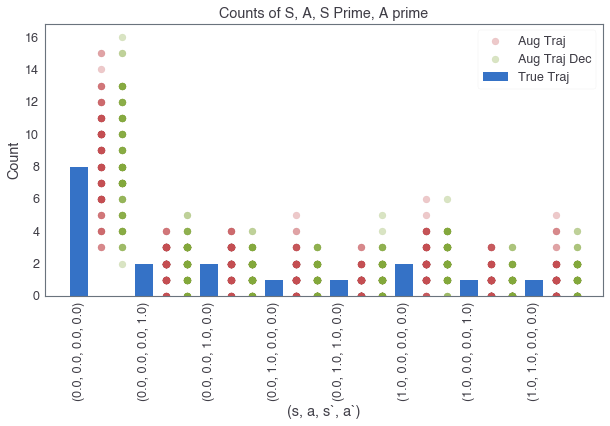

In [391]:
plt.figure(figsize=(10,5))
plt.bar(x=range(0, 3*true_counts_df.shape[0], 3), height=true_counts_df.values, label='True Traj')
label_set=0
for aug_count, aug_count_dec in zip(aug_count_df_list, aug_count_dec_df_list):
    y_vals = aug_count.values
    y_vals_dec = aug_count_dec.values
    x_vals = range(1, 3*true_counts_df.shape[0], 3)
    x_vals_dec = range(2, 3*true_counts_df.shape[0], 3)
    if not label_set:
        label='Aug Traj'
        label_dec = 'Aug Traj Dec'
        label_set=1
    else:
        label=''
        label_dec = ''
    plt.scatter(x_vals, y_vals, c='r', alpha=0.3, s=50, label=label)
    plt.scatter(x_vals_dec, y_vals_dec, c='g', alpha=0.3, s=50, label=label_dec)


# for n_id, idx in enumerate(true_counts_df.index):
#     value_set = [aug_count_df[idx] for aug_count_df in aug_count_df_list]
#     bp1=plt.boxplot(value_set, positions=[1+n_id*3], widths=0.8, meanline=True,
#                    patch_artist=True, boxprops=dict(facecolor="red", alpha=0.3))
    
#     value_set_dec = [aug_count_dec_df[idx] for aug_count_dec_df in aug_count_dec_df_list]
#     bp2=plt.boxplot(value_set_dec, positions=[2+n_id*3], widths=0.8, meanline=True,
#                    patch_artist=True, boxprops=dict(facecolor="green", alpha=0.3))

# import matplotlib.patches as mpatches
# blue_patch = mpatches.Patch(color='blue', label='True Traj')
# green_patch = mpatches.Patch(color='green',alpha=0.3, label='Aug Traj (s,a,s)')
# red_patch = mpatches.Patch(color='red', alpha=0.3,label='Aug Traj (s,a,s\',a\')')


        
plt.xticks(range(0, 3*true_counts_df.shape[0], 3), true_counts_df.index, rotation=90)
plt.xlabel('(s, a, s`, a`)')
plt.ylabel('Count')
# plt.legend(handles=[blue_patch, red_patch, green_patch])
plt.legend()
plt.grid(False)
plt.title('Counts of S, A, S Prime, A prime')

Text(0.5, 1.0, 'Counts of S, A, S Prime, A prime')

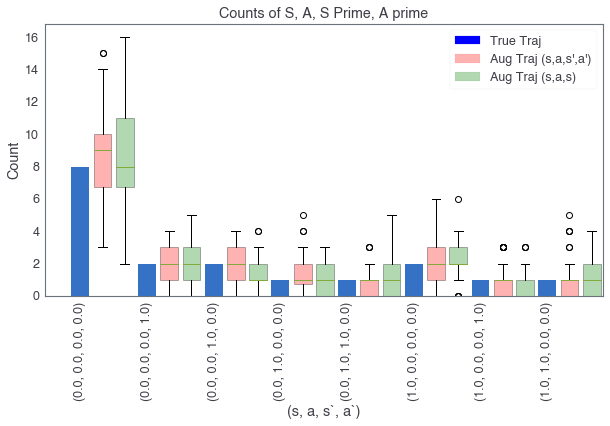

In [390]:
plt.figure(figsize=(10,5))
plt.bar(x=range(0, 3*true_counts_df.shape[0], 3), height=true_counts_df.values, label='True Traj')
label_set=0
# for aug_count, aug_count_dec in zip(aug_count_df_list, aug_count_dec_df_list):
#     y_vals = aug_count.values
#     y_vals_dec = aug_count_dec.values
#     x_vals = range(1, 3*true_counts_df.shape[0], 3)
#     x_vals_dec = range(2, 3*true_counts_df.shape[0], 3)
#     if not label_set:
#         label='Aug Traj'
#         label_dec = 'Aug Traj Dec'
#         label_set=1
#     else:
#         label=''
#         label_dec = ''
#     plt.scatter(x_vals, y_vals, c='r', alpha=0.3, s=50, label=label)
#     plt.scatter(x_vals_dec, y_vals_dec, c='g', alpha=0.3, s=50, label=label_dec)


for n_id, idx in enumerate(true_counts_df.index):
    value_set = [aug_count_df[idx] for aug_count_df in aug_count_df_list]
    bp1=plt.boxplot(value_set, positions=[1+n_id*3], widths=0.8, meanline=True,
                   patch_artist=True, boxprops=dict(facecolor="red", alpha=0.3))
    
    value_set_dec = [aug_count_dec_df[idx] for aug_count_dec_df in aug_count_dec_df_list]
    bp2=plt.boxplot(value_set_dec, positions=[2+n_id*3], widths=0.8, meanline=True,
                   patch_artist=True, boxprops=dict(facecolor="green", alpha=0.3))

import matplotlib.patches as mpatches
blue_patch = mpatches.Patch(color='blue', label='True Traj')
green_patch = mpatches.Patch(color='green',alpha=0.3, label='Aug Traj (s,a,s)')
red_patch = mpatches.Patch(color='red', alpha=0.3,label='Aug Traj (s,a,s\',a\')')


# plt.legend([bp1["boxes"][0], bp2["boxes"][0]], ['A', 'B'], loc='upper right')
        
plt.xticks(range(0, 3*true_counts_df.shape[0], 3), true_counts_df.index, rotation=90)
plt.xlabel('(s, a, s`, a`)')
plt.ylabel('Count')
plt.legend(handles=[blue_patch, red_patch, green_patch])
plt.grid(False)
plt.title('Counts of S, A, S Prime, A prime')

In [ ]:
0, 0, 1, 0
1, 0, 0, 0
0, 0, 0, 1
0, 1, 1, 1

1, 0, 0, 0
0, 0, 0, 1
0, 1, 0, 1
0, 1, 1, 1

{(0, 0): {(1, 0): 0.5, (0,1): 0.5},
 (1, 0): {{0, 0}: 1}
 (0, 1): {(1, 1): 1}
 (1, 1): ??
}

{(1, 1): {(0, 1): 1},
 (0, 1): {(0, 0): 1},
 (0, 0): {(1, 0)}
}


 


In [205]:
flatten_dict(emp_prob_by_benef[10])

array([0.7272727272727273, 0.18181818181818182, 0.09090909090909091, 0.0,
       0.6666666666666666, 0.0, 0.3333333333333333, 0.0, 0.5, 0.25, 0.25,
       0.0, None, None, None, None], dtype=object)

In [196]:
np.array(rms_list)[(np.array(rms_list)<.15) & (np.array(rms_list)>-1)]

array([0.13433866, 0.14965118, 0.08987624, 0.14454791, 0.132169  ,
       0.10238701, 0.10062781, 0.14973936, 0.14454791, 0.13970671,
       0.11129759, 0.11707518, 0.10925092, 0.11914934, 0.10193442,
       0.13932577, 0.09083478, 0.14633357, 0.10789173, 0.10956828,
       0.08838835, 0.11659224, 0.13984049, 0.146457  , 0.13900689,
       0.12899855, 0.14657549, 0.14422891])

In [200]:
filtered_aug_traj = benef_level_aug_traj[(np.array(rms_list)<.2) & (np.array(rms_list)>-1)]
opeIS(filtered_aug_traj, w, mask, n_benefs, T, K, len(filtered_aug_traj), gamma,
                    target_policy_name, beh_policy_name)

OPE: 100%|██████████| 30/30 [00:00<00:00, 55.28it/s]

OPE: 713.9562968075812


713.9562968075812

In [130]:
def evaluate(aug_traj, traj_sample_size, n_samples):
    out = []
    print(f'Evaluation on {traj_sample_size} trajectories')
    for _ in range(n_samples):
        traj_idx_sample = np.random.choice(len(aug_traj), traj_sample_size, replace=False)

        aug_traj_subset = aug_traj[traj_idx_sample]

        ope_whittle = opeIS(aug_traj_subset, w, mask, n_benefs, T, K, traj_sample_size, gamma,
                    target_policy_name, beh_policy_name)
        out.append(ope_whittle)
    print('\tFinal OPE: ', np.mean(out))
    print('\tstd-dev', np.std(out))
    return out

n_samples = 200
traj_sample_sizes = [1]
# benef_level_ope_dec = []
# cluster_level_ope_dec = []
benef_level_ope = []
cluster_level_ope = []

for traj_sample_size in traj_sample_sizes:
    benef_level_ope.append(evaluate(benef_level_aug_traj, traj_sample_size, n_samples))
#     cluster_level_ope.append(evaluate(cluster_level_aug_traj, traj_sample_size, n_samples))

#     benef_level_ope_dec.append(evaluate(benef_level_aug_traj_dec, traj_sample_size, n_samples))
#     cluster_level_ope_dec.append(evaluate(cluster_level_aug_traj_dec, traj_sample_size, n_samples))


Evaluation on 1 trajectories


OPE: 100%|██████████| 30/30 [00:00<00:00, 2137.99it/s]


OPE: 47.3155427389617


OPE: 100%|██████████| 30/30 [00:00<00:00, 1003.78it/s]


OPE: 21.179246368848272


OPE: 100%|██████████| 30/30 [00:00<00:00, 1785.70it/s]


OPE: 160.77756060558372


OPE: 100%|██████████| 30/30 [00:00<00:00, 2093.31it/s]


OPE: 43.421946340884006


OPE: 100%|██████████| 30/30 [00:00<00:00, 2107.02it/s]


OPE: 97.50529363553032


OPE: 100%|██████████| 30/30 [00:00<00:00, 2289.38it/s]


OPE: 81.30924778835022


OPE: 100%|██████████| 30/30 [00:00<00:00, 2141.77it/s]


OPE: 97.5676376022332


OPE: 100%|██████████| 30/30 [00:00<00:00, 2168.57it/s]


OPE: 127.66183500970325


OPE: 100%|██████████| 30/30 [00:00<00:00, 2171.08it/s]


OPE: 206.57235879768595


OPE: 100%|██████████| 30/30 [00:00<00:00, 2158.08it/s]


OPE: 150.07084121864918


OPE: 100%|██████████| 30/30 [00:00<00:00, 2138.42it/s]


OPE: 85.51918862614059


OPE: 100%|██████████| 30/30 [00:00<00:00, 1975.46it/s]


OPE: 87.28248428404446


OPE: 100%|██████████| 30/30 [00:00<00:00, 2094.53it/s]


OPE: 99.30636431895671


OPE: 100%|██████████| 30/30 [00:00<00:00, 1858.55it/s]


OPE: 72.72633560080943


OPE: 100%|██████████| 30/30 [00:00<00:00, 1943.01it/s]


OPE: 23.476350187426128


OPE: 100%|██████████| 30/30 [00:00<00:00, 1942.86it/s]


OPE: 424.68398112158116


OPE: 100%|██████████| 30/30 [00:00<00:00, 2048.87it/s]


OPE: 175.05687334783698


OPE: 100%|██████████| 30/30 [00:00<00:00, 2181.81it/s]


OPE: 2033.031044728116


OPE: 100%|██████████| 30/30 [00:00<00:00, 2051.14it/s]


OPE: 46.59283293631476


OPE: 100%|██████████| 30/30 [00:00<00:00, 2117.91it/s]


OPE: 25.38433147531944


OPE: 100%|██████████| 30/30 [00:00<00:00, 2090.88it/s]


OPE: 1269.5745187772538


OPE: 100%|██████████| 30/30 [00:00<00:00, 2058.05it/s]


OPE: 3464.7746746854323


OPE: 100%|██████████| 30/30 [00:00<00:00, 1937.98it/s]


OPE: 270.75270968940475


OPE: 100%|██████████| 30/30 [00:00<00:00, 2027.02it/s]


OPE: 42.932438543501654


OPE: 100%|██████████| 30/30 [00:00<00:00, 2054.49it/s]


OPE: 139.21290003190904


OPE: 100%|██████████| 30/30 [00:00<00:00, 2182.15it/s]


OPE: 84.34878409531743


OPE: 100%|██████████| 30/30 [00:00<00:00, 2140.42it/s]


OPE: 47.653116818072604


OPE: 100%|██████████| 30/30 [00:00<00:00, 1956.45it/s]


OPE: 51.33104464723829


OPE: 100%|██████████| 30/30 [00:00<00:00, 2072.39it/s]


OPE: 140.6534315890898


OPE: 100%|██████████| 30/30 [00:00<00:00, 1763.99it/s]


OPE: 41.1159492111311


OPE: 100%|██████████| 30/30 [00:00<00:00, 1906.70it/s]


OPE: 40.269941184547065


OPE: 100%|██████████| 30/30 [00:00<00:00, 2073.68it/s]


OPE: 205.9939327441174


OPE: 100%|██████████| 30/30 [00:00<00:00, 2130.10it/s]


OPE: 68.58688855809842


OPE: 100%|██████████| 30/30 [00:00<00:00, 2089.42it/s]


OPE: 74.23461049324777


OPE: 100%|██████████| 30/30 [00:00<00:00, 2129.20it/s]


OPE: 193.4344747199968


OPE: 100%|██████████| 30/30 [00:00<00:00, 2090.91it/s]


OPE: 38.03099174352157


OPE: 100%|██████████| 30/30 [00:00<00:00, 2032.42it/s]


OPE: 75.4663002740432


OPE: 100%|██████████| 30/30 [00:00<00:00, 1990.46it/s]


OPE: 46.57722614168673


OPE: 100%|██████████| 30/30 [00:00<00:00, 1946.16it/s]


OPE: 152.13659421166824


OPE: 100%|██████████| 30/30 [00:00<00:00, 2104.24it/s]


OPE: 2453.763564786675


OPE: 100%|██████████| 30/30 [00:00<00:00, 2050.17it/s]


OPE: 81.34115466102216


OPE: 100%|██████████| 30/30 [00:00<00:00, 2165.77it/s]


OPE: 116.20003965851731


OPE: 100%|██████████| 30/30 [00:00<00:00, 2149.31it/s]


OPE: 36.97700190971242


OPE: 100%|██████████| 30/30 [00:00<00:00, 2208.15it/s]


OPE: 105.40923954360684


OPE: 100%|██████████| 30/30 [00:00<00:00, 2059.03it/s]


OPE: 3615.8533998494113


OPE: 100%|██████████| 30/30 [00:00<00:00, 2089.59it/s]


OPE: 38.14443175964794


OPE: 100%|██████████| 30/30 [00:00<00:00, 1992.39it/s]


OPE: 175.07021963584333


OPE: 100%|██████████| 30/30 [00:00<00:00, 1963.84it/s]


OPE: 47.53146406753165


OPE: 100%|██████████| 30/30 [00:00<00:00, 2073.82it/s]


OPE: 62.25105728448196


OPE: 100%|██████████| 30/30 [00:00<00:00, 1962.74it/s]


OPE: 9190.761449385478


OPE: 100%|██████████| 30/30 [00:00<00:00, 1931.49it/s]


OPE: 1468.050291329097


OPE: 100%|██████████| 30/30 [00:00<00:00, 1938.58it/s]


OPE: 45.168124592367256


OPE: 100%|██████████| 30/30 [00:00<00:00, 1807.45it/s]


OPE: 72.29690311086166


OPE: 100%|██████████| 30/30 [00:00<00:00, 1834.06it/s]


OPE: 28.211875316256613


OPE: 100%|██████████| 30/30 [00:00<00:00, 1918.65it/s]


OPE: 321.1016686134791


OPE: 100%|██████████| 30/30 [00:00<00:00, 2172.13it/s]


OPE: 22.270046482317724


OPE: 100%|██████████| 30/30 [00:00<00:00, 2019.28it/s]


OPE: 462.8400098794771


OPE: 100%|██████████| 30/30 [00:00<00:00, 2211.56it/s]


OPE: 473.5445392653017


OPE: 100%|██████████| 30/30 [00:00<00:00, 2092.62it/s]


OPE: 31.679527805772132


OPE: 100%|██████████| 30/30 [00:00<00:00, 2052.41it/s]


OPE: 89.86578147488649


OPE: 100%|██████████| 30/30 [00:00<00:00, 1735.12it/s]


OPE: 4310.691511804563


OPE: 100%|██████████| 30/30 [00:00<00:00, 1935.00it/s]


OPE: 321.15019175544205


OPE: 100%|██████████| 30/30 [00:00<00:00, 2139.91it/s]


OPE: 52.80548751902465


OPE: 100%|██████████| 30/30 [00:00<00:00, 2169.50it/s]


OPE: 375.39445040835835


OPE: 100%|██████████| 30/30 [00:00<00:00, 2006.30it/s]


OPE: 41.943048660966376


OPE: 100%|██████████| 30/30 [00:00<00:00, 2018.98it/s]


OPE: 124.43505664723189


OPE: 100%|██████████| 30/30 [00:00<00:00, 1975.74it/s]


OPE: 411.6403674408115


OPE: 100%|██████████| 30/30 [00:00<00:00, 1921.70it/s]


OPE: 34.76092636194012


OPE: 100%|██████████| 30/30 [00:00<00:00, 2072.39it/s]


OPE: 152.58756760747988


OPE: 100%|██████████| 30/30 [00:00<00:00, 2039.87it/s]


OPE: 77.0307362632107


OPE: 100%|██████████| 30/30 [00:00<00:00, 2050.10it/s]


OPE: 37.743725381332226


OPE: 100%|██████████| 30/30 [00:00<00:00, 2036.56it/s]


OPE: 29.91198569057406


OPE: 100%|██████████| 30/30 [00:00<00:00, 1908.76it/s]


OPE: 224.50063060460894


OPE: 100%|██████████| 30/30 [00:00<00:00, 1961.30it/s]


OPE: 30.516665175025267


OPE: 100%|██████████| 30/30 [00:00<00:00, 2108.68it/s]


OPE: 137.87727823054587


OPE: 100%|██████████| 30/30 [00:00<00:00, 2151.77it/s]


OPE: 135.00899472229622


OPE: 100%|██████████| 30/30 [00:00<00:00, 2158.27it/s]


OPE: 264.6875342678856


OPE: 100%|██████████| 30/30 [00:00<00:00, 2216.47it/s]


OPE: 861.5007435101874


OPE: 100%|██████████| 30/30 [00:00<00:00, 2139.19it/s]


OPE: 168.82369231258113


OPE: 100%|██████████| 30/30 [00:00<00:00, 2222.07it/s]


OPE: 196.20144630465026


OPE: 100%|██████████| 30/30 [00:00<00:00, 2209.47it/s]


OPE: 26.923249431141848


OPE: 100%|██████████| 30/30 [00:00<00:00, 2263.64it/s]


OPE: 59.34392437133399


OPE: 100%|██████████| 30/30 [00:00<00:00, 2091.33it/s]


OPE: 545.1269843902097


OPE: 100%|██████████| 30/30 [00:00<00:00, 2277.94it/s]


OPE: 88.5672382812434


OPE: 100%|██████████| 30/30 [00:00<00:00, 2340.27it/s]


OPE: 36.66097935297714


OPE: 100%|██████████| 30/30 [00:00<00:00, 2091.92it/s]


OPE: 881.5716185502291


OPE: 100%|██████████| 30/30 [00:00<00:00, 2327.54it/s]


OPE: 37.552852675256005


OPE: 100%|██████████| 30/30 [00:00<00:00, 2253.95it/s]


OPE: 266.25993301450984


OPE: 100%|██████████| 30/30 [00:00<00:00, 2160.90it/s]


OPE: 187.93238546294327


OPE: 100%|██████████| 30/30 [00:00<00:00, 2271.32it/s]


OPE: 47.21487839199473


OPE: 100%|██████████| 30/30 [00:00<00:00, 2230.97it/s]


OPE: 23.476350187426128


OPE: 100%|██████████| 30/30 [00:00<00:00, 2205.44it/s]


OPE: 38.28719723235205


OPE: 100%|██████████| 30/30 [00:00<00:00, 2138.71it/s]


OPE: 173.52995120245802


OPE: 100%|██████████| 30/30 [00:00<00:00, 2160.27it/s]


OPE: 65.23298436077134


OPE: 100%|██████████| 30/30 [00:00<00:00, 2166.70it/s]


OPE: 67.06730963145321


OPE: 100%|██████████| 30/30 [00:00<00:00, 2126.32it/s]


OPE: 390.1866819087041


OPE: 100%|██████████| 30/30 [00:00<00:00, 2065.52it/s]


OPE: 108.22145233601417


OPE: 100%|██████████| 30/30 [00:00<00:00, 2242.82it/s]


OPE: 93.89339101135896


OPE: 100%|██████████| 30/30 [00:00<00:00, 2027.41it/s]


OPE: 2859.5952495173356


OPE: 100%|██████████| 30/30 [00:00<00:00, 2300.27it/s]


OPE: 76.7567337508108


OPE: 100%|██████████| 30/30 [00:00<00:00, 2137.84it/s]


OPE: 138.03860597216763


OPE: 100%|██████████| 30/30 [00:00<00:00, 2061.02it/s]


OPE: 106.32292725442436


OPE: 100%|██████████| 30/30 [00:00<00:00, 1979.01it/s]


OPE: 66.24240930365039


OPE: 100%|██████████| 30/30 [00:00<00:00, 2088.14it/s]


OPE: 268.3153510087668


OPE: 100%|██████████| 30/30 [00:00<00:00, 2003.07it/s]


OPE: 62.06785314286986


OPE: 100%|██████████| 30/30 [00:00<00:00, 1992.95it/s]


OPE: 23.560602769579273


OPE: 100%|██████████| 30/30 [00:00<00:00, 2085.23it/s]


OPE: 9166.581524660132


OPE: 100%|██████████| 30/30 [00:00<00:00, 1998.11it/s]


OPE: 96.61099677734478


OPE: 100%|██████████| 30/30 [00:00<00:00, 2094.64it/s]


OPE: 80.4847545347863


OPE: 100%|██████████| 30/30 [00:00<00:00, 2151.44it/s]


OPE: 103.0023597068284


OPE: 100%|██████████| 30/30 [00:00<00:00, 2137.22it/s]


OPE: 54.84149371908801


OPE: 100%|██████████| 30/30 [00:00<00:00, 2178.18it/s]


OPE: 26.566762960763253


OPE: 100%|██████████| 30/30 [00:00<00:00, 1941.78it/s]


OPE: 61.85888471165272


OPE: 100%|██████████| 30/30 [00:00<00:00, 2107.20it/s]


OPE: 56.1237012333908


OPE: 100%|██████████| 30/30 [00:00<00:00, 2248.35it/s]


OPE: 44.395780708981306


OPE: 100%|██████████| 30/30 [00:00<00:00, 2174.42it/s]


OPE: 46.812774076659274


OPE: 100%|██████████| 30/30 [00:00<00:00, 2162.50it/s]


OPE: 156.87915090582374


OPE: 100%|██████████| 30/30 [00:00<00:00, 2203.01it/s]


OPE: 43.51306527508971


OPE: 100%|██████████| 30/30 [00:00<00:00, 2193.48it/s]


OPE: 42.55707647309898


OPE: 100%|██████████| 30/30 [00:00<00:00, 2322.13it/s]


OPE: 52.26290210306563


OPE: 100%|██████████| 30/30 [00:00<00:00, 2217.14it/s]


OPE: 68.41981970218866


OPE: 100%|██████████| 30/30 [00:00<00:00, 2216.78it/s]


OPE: 1187.7528746622718


OPE: 100%|██████████| 30/30 [00:00<00:00, 2226.83it/s]


OPE: 2635.1993544335796


OPE: 100%|██████████| 30/30 [00:00<00:00, 2221.72it/s]


OPE: 23.70196024737021


OPE: 100%|██████████| 30/30 [00:00<00:00, 2178.18it/s]


OPE: 120.05381496797267


OPE: 100%|██████████| 30/30 [00:00<00:00, 2267.89it/s]


OPE: 66.43951321968854


OPE: 100%|██████████| 30/30 [00:00<00:00, 2167.64it/s]


OPE: 138.6120225100666


OPE: 100%|██████████| 30/30 [00:00<00:00, 2228.33it/s]


OPE: 592.4218911169792


OPE: 100%|██████████| 30/30 [00:00<00:00, 2115.95it/s]


OPE: 84.74846623374943


OPE: 100%|██████████| 30/30 [00:00<00:00, 2187.38it/s]


OPE: 41.80715330936039


OPE: 100%|██████████| 30/30 [00:00<00:00, 2114.03it/s]


OPE: 40.87156327240356


OPE: 100%|██████████| 30/30 [00:00<00:00, 2106.28it/s]


OPE: 463.04530815708335


OPE: 100%|██████████| 30/30 [00:00<00:00, 2049.03it/s]


OPE: 120.43564736159428


OPE: 100%|██████████| 30/30 [00:00<00:00, 2028.81it/s]


OPE: 22.35671832508245


OPE: 100%|██████████| 30/30 [00:00<00:00, 2027.05it/s]


OPE: 29.478526010206483


OPE: 100%|██████████| 30/30 [00:00<00:00, 2150.48it/s]


OPE: 101.5401602746041


OPE: 100%|██████████| 30/30 [00:00<00:00, 2159.49it/s]


OPE: 141.86858364703772


OPE: 100%|██████████| 30/30 [00:00<00:00, 2245.18it/s]


OPE: 66.4654953618673


OPE: 100%|██████████| 30/30 [00:00<00:00, 2123.27it/s]


OPE: 509.9859601713874


OPE: 100%|██████████| 30/30 [00:00<00:00, 2220.23it/s]


OPE: 373.49767116467103


OPE: 100%|██████████| 30/30 [00:00<00:00, 2182.75it/s]


OPE: 48.70622718506368


OPE: 100%|██████████| 30/30 [00:00<00:00, 2272.19it/s]


OPE: 79.12321560096527


OPE: 100%|██████████| 30/30 [00:00<00:00, 2251.37it/s]


OPE: 1559.716980308219


OPE: 100%|██████████| 30/30 [00:00<00:00, 2307.52it/s]


OPE: 39.32715730664407


OPE: 100%|██████████| 30/30 [00:00<00:00, 2239.31it/s]


OPE: 319.5592861632972


OPE: 100%|██████████| 30/30 [00:00<00:00, 2310.19it/s]


OPE: 93.86536525105075


OPE: 100%|██████████| 30/30 [00:00<00:00, 2118.37it/s]


OPE: 40.89149598254551


OPE: 100%|██████████| 30/30 [00:00<00:00, 2081.88it/s]


OPE: 30.02026270240027


OPE: 100%|██████████| 30/30 [00:00<00:00, 2349.75it/s]


OPE: 63.5458253564301


OPE: 100%|██████████| 30/30 [00:00<00:00, 2268.46it/s]


OPE: 1084.5491672664914


OPE: 100%|██████████| 30/30 [00:00<00:00, 2236.01it/s]


OPE: 65.83029343791532


OPE: 100%|██████████| 30/30 [00:00<00:00, 2345.37it/s]


OPE: 57.01059810939003


OPE: 100%|██████████| 30/30 [00:00<00:00, 2139.95it/s]


OPE: 69.85858198425122


OPE: 100%|██████████| 30/30 [00:00<00:00, 2174.72it/s]


OPE: 33.89340437264805


OPE: 100%|██████████| 30/30 [00:00<00:00, 2198.58it/s]


OPE: 117.30209067419115


OPE: 100%|██████████| 30/30 [00:00<00:00, 2272.35it/s]


OPE: 426.546976194977


OPE: 100%|██████████| 30/30 [00:00<00:00, 2159.67it/s]


OPE: 31.35054864444976


OPE: 100%|██████████| 30/30 [00:00<00:00, 2201.50it/s]


OPE: 65.33716275686284


OPE: 100%|██████████| 30/30 [00:00<00:00, 2123.73it/s]


OPE: 29.30067608781023


OPE: 100%|██████████| 30/30 [00:00<00:00, 2232.75it/s]


OPE: 5879.410489010693


OPE: 100%|██████████| 30/30 [00:00<00:00, 2011.11it/s]


OPE: 90.36119283914596


OPE: 100%|██████████| 30/30 [00:00<00:00, 2230.14it/s]


OPE: 99.98502158615273


OPE: 100%|██████████| 30/30 [00:00<00:00, 2224.15it/s]


OPE: 35.52064501488646


OPE: 100%|██████████| 30/30 [00:00<00:00, 2051.41it/s]


OPE: 131.13554581841083


OPE: 100%|██████████| 30/30 [00:00<00:00, 2117.44it/s]


OPE: 75.04263574442334


OPE: 100%|██████████| 30/30 [00:00<00:00, 2039.57it/s]


OPE: 35.400484146677584


OPE: 100%|██████████| 30/30 [00:00<00:00, 2125.28it/s]


OPE: 63.4209067105786


OPE: 100%|██████████| 30/30 [00:00<00:00, 2101.00it/s]


OPE: 30.97981210427156


OPE: 100%|██████████| 30/30 [00:00<00:00, 2117.73it/s]


OPE: 72.8710547235867


OPE: 100%|██████████| 30/30 [00:00<00:00, 2148.21it/s]


OPE: 103.26969164940286


OPE: 100%|██████████| 30/30 [00:00<00:00, 2103.04it/s]


OPE: 70.92882816989452


OPE: 100%|██████████| 30/30 [00:00<00:00, 2218.93it/s]


OPE: 648.8744087675086


OPE: 100%|██████████| 30/30 [00:00<00:00, 2166.22it/s]


OPE: 57.175857469847315


OPE: 100%|██████████| 30/30 [00:00<00:00, 2092.20it/s]


OPE: 93.97150070203658


OPE: 100%|██████████| 30/30 [00:00<00:00, 2256.46it/s]


OPE: 142.11097484188238


OPE: 100%|██████████| 30/30 [00:00<00:00, 2300.22it/s]


OPE: 60.65746846122777


OPE: 100%|██████████| 30/30 [00:00<00:00, 2273.05it/s]


OPE: 25.246356483120007


OPE: 100%|██████████| 30/30 [00:00<00:00, 2231.65it/s]


OPE: 19.993747004180424


OPE: 100%|██████████| 30/30 [00:00<00:00, 2208.85it/s]


OPE: 27.339782925106533


OPE: 100%|██████████| 30/30 [00:00<00:00, 2166.85it/s]


OPE: 216.82378971073166


OPE: 100%|██████████| 30/30 [00:00<00:00, 2165.29it/s]


OPE: 43.34205910715472


OPE: 100%|██████████| 30/30 [00:00<00:00, 2321.23it/s]


OPE: 60.819324249077326


OPE: 100%|██████████| 30/30 [00:00<00:00, 2344.32it/s]


OPE: 29.781536104456343


OPE: 100%|██████████| 30/30 [00:00<00:00, 2246.87it/s]


OPE: 102.00136334838847


OPE: 100%|██████████| 30/30 [00:00<00:00, 2252.10it/s]


OPE: 150.5210598652074


OPE: 100%|██████████| 30/30 [00:00<00:00, 2138.90it/s]


OPE: 99.19756909136144


OPE: 100%|██████████| 30/30 [00:00<00:00, 2221.25it/s]


OPE: 16523.93885573565


OPE: 100%|██████████| 30/30 [00:00<00:00, 2274.24it/s]


OPE: 91.79317134569575


OPE: 100%|██████████| 30/30 [00:00<00:00, 2106.28it/s]


OPE: 182.1541768174818


OPE: 100%|██████████| 30/30 [00:00<00:00, 2077.52it/s]


OPE: 158.21099883178675


OPE: 100%|██████████| 30/30 [00:00<00:00, 2155.97it/s]


OPE: 49.70457498450828


OPE: 100%|██████████| 30/30 [00:00<00:00, 2259.38it/s]


OPE: 43.56250218542997


OPE: 100%|██████████| 30/30 [00:00<00:00, 2095.41it/s]


OPE: 39.32783448443443


OPE: 100%|██████████| 30/30 [00:00<00:00, 2138.71it/s]


OPE: 72.59175494117036


OPE: 100%|██████████| 30/30 [00:00<00:00, 2116.41it/s]


OPE: 126.41682707433374


OPE: 100%|██████████| 30/30 [00:00<00:00, 2179.73it/s]


OPE: 93.42100985210801


OPE: 100%|██████████| 30/30 [00:00<00:00, 2185.48it/s]


OPE: 183.44331760413274


OPE: 100%|██████████| 30/30 [00:00<00:00, 2176.45it/s]


OPE: 38.566771778424894


OPE: 100%|██████████| 30/30 [00:00<00:00, 2312.82it/s]


OPE: 68.43520271725257


OPE: 100%|██████████| 30/30 [00:00<00:00, 2124.92it/s]

OPE: 40.3237101098334
	Final OPE:  457.5700880598891
	std-dev 1610.0219401635236


In [118]:
new_benef_level_ope

[array([ 28.68007034, 140.42310667, 406.32333662,  23.27632607,
        576.82521713,  65.27866592, 434.12484058,  28.3247426 ,
        154.33772699,  26.67331306,  81.93312283,  33.12560773,
         56.29978079,  80.91031103, 291.79419034, 123.26868248,
         80.94531225,  71.96697458,  22.12682565]),
 array([ 26.27925257,  89.70175496, 166.82165676, 132.4233547 ,
        318.69835189,  93.15582637, 459.95003774, 123.59303449,
        230.67805984, 271.67684756, 568.47864992, 117.82508566,
        325.25708932,  71.66873341,  62.34614723]),
 array([226.91545654, 453.18552775, 302.4097091 , 101.05265973,
        116.77133966, 163.40822428,  95.17976157,  93.47459721,
        178.41513406, 151.45047509, 155.57733544, 251.6510245 ,
        250.0991136 , 165.2251928 , 216.58215568, 278.1675345 ,
        223.28118651]),
 array([281.63044594, 243.3082118 , 427.28558507, 267.1827255 ,
        123.66813174, 233.51944636, 674.46558024, 730.80118241,
        188.6925791 , 681.99331915, 870.

/Users/vermashresth/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/vermashresth/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/vermashresth/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/vermashresth/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/vermashresth/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


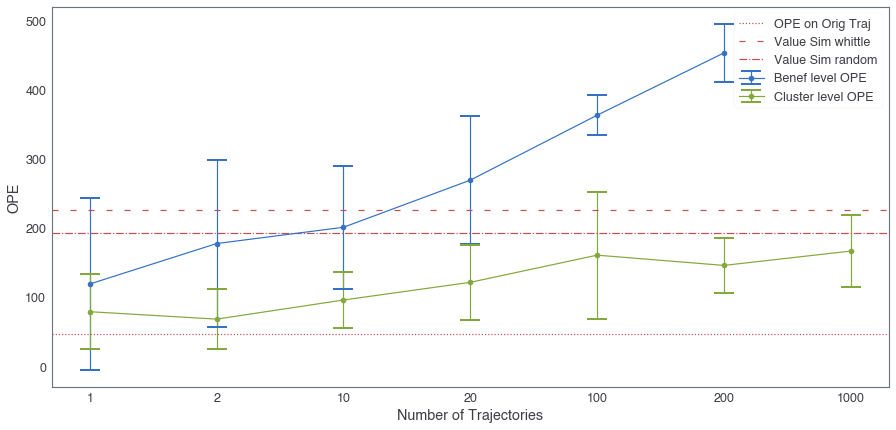

In [129]:
plt.figure(figsize=(15, 7))
new_benef_level_ope = []
new_cluster_level_ope = []

for i in range(len(traj_sample_sizes)):
    tar = np.array(benef_level_ope[i])
    new_benef_level_ope.append(tar[tar<500])
    tar = np.array(cluster_level_ope[i])
    new_cluster_level_ope.append(tar[tar<500])

# plt.errorbar(np.arange(len(benef_level_ope_dec)), np.array(benef_level_ope_dec)[:, 0],
#              yerr=np.array(benef_level_ope_dec)[:, 1], label='Benef level OPE',
#              marker='o', capsize=10, capthick=2)
# plt.errorbar(np.arange(len(cluster_level_ope_dec)), np.array(cluster_level_ope_dec)[:, 0],
#              yerr=np.array(cluster_level_ope_dec)[:, 1], label='Cluster level OPE Dec',
#              marker='o', capsize=10, capthick=2)

plt.errorbar(np.arange(len(new_benef_level_ope)), [np.mean(i) for i in new_benef_level_ope],
             yerr=[np.std(i) for i in new_benef_level_ope], label='Benef level OPE',
             marker='o', capsize=10, capthick=2)
plt.errorbar(np.arange(len(new_cluster_level_ope)), [np.mean(i) for i in new_cluster_level_ope],
             yerr=[np.std(i) for i in new_cluster_level_ope], label='Cluster level OPE',
             marker='o', capsize=10, capthick=2)

plt.axhline(y=ope_whittle,
            color='r', linestyle='dotted', label='OPE on Orig Traj')
plt.axhline(y=simulated_rewards[0][policy_map[target_policy_name]],
            color='r', linestyle=(0, (5, 10)), label=f'Value Sim {target_policy_name}')
plt.axhline(y=simulated_rewards[0][policy_map[beh_policy_name]],
            color='r', linestyle='dashdot', label=f'Value Sim {beh_policy_name}')

plt.xticks(np.arange(len(traj_sample_sizes)), traj_sample_sizes)
plt.xlabel('Number of Trajectories')
plt.ylabel('OPE')
# plt.ylim(0, 2000)
plt.legend()
plt.grid(False)
plt.show()

In [128]:
new_benef_level_ope[-6].shape

(15,)

Text(0.5, 0, 'n_aug_trajectories')

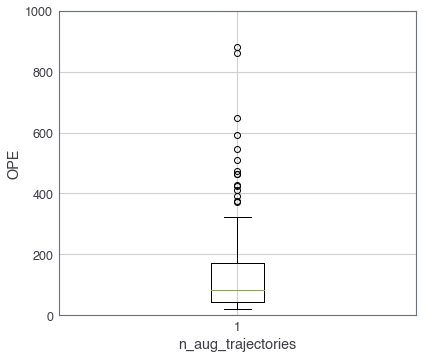

In [148]:
plt.boxplot(benef_level_ope)
plt.ylim(0,1000)
plt.ylabel('OPE')
plt.xlabel('n_aug_trajectories')

In [141]:
np.array(benef_level_ope).min(), np.array(benef_level_ope).max()

(19.993747004180424, 16523.93885573565)

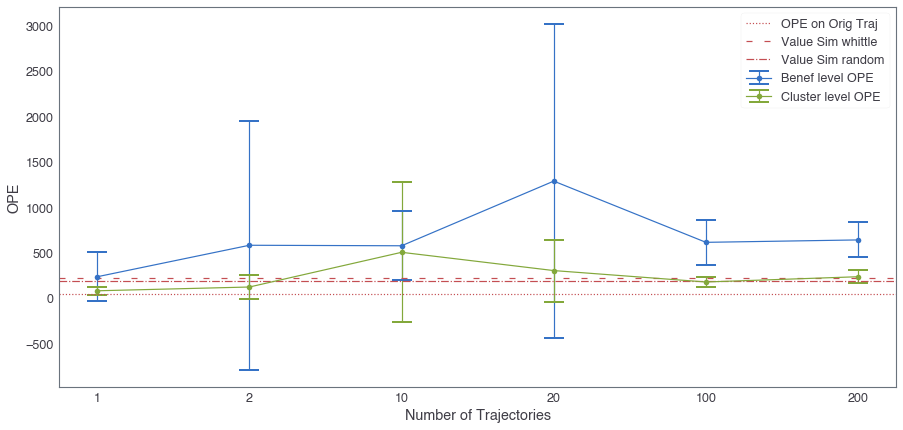

In [100]:
plt.figure(figsize=(15, 7))
# plt.errorbar(np.arange(len(benef_level_ope_dec)), np.array(benef_level_ope_dec)[:, 0],
#              yerr=np.array(benef_level_ope_dec)[:, 1], label='Benef level OPE',
#              marker='o', capsize=10, capthick=2)
# plt.errorbar(np.arange(len(cluster_level_ope_dec)), np.array(cluster_level_ope_dec)[:, 0],
#              yerr=np.array(cluster_level_ope_dec)[:, 1], label='Cluster level OPE Dec',
#              marker='o', capsize=10, capthick=2)

plt.errorbar(np.arange(len(benef_level_ope)), np.mean(benef_level_ope, axis=1),
             yerr=np.std(benef_level_ope, axis=1), label='Benef level OPE',
             marker='o', capsize=10, capthick=2)
plt.errorbar(np.arange(len(cluster_level_ope)), np.mean(cluster_level_ope, axis=1),
             yerr=np.std(cluster_level_ope, axis=1), label='Cluster level OPE',
             marker='o', capsize=10, capthick=2)

plt.axhline(y=ope_whittle,
            color='r', linestyle='dotted', label='OPE on Orig Traj')
plt.axhline(y=simulated_rewards[0][policy_map[target_policy_name]],
            color='r', linestyle=(0, (5, 10)), label=f'Value Sim {target_policy_name}')
plt.axhline(y=simulated_rewards[0][policy_map[beh_policy_name]],
            color='r', linestyle='dashdot', label=f'Value Sim {beh_policy_name}')

plt.xticks(np.arange(len(traj_sample_sizes)), traj_sample_sizes)
plt.xlabel('Number of Trajectories')
plt.ylabel('OPE')
plt.legend()
plt.grid(False)
plt.show()

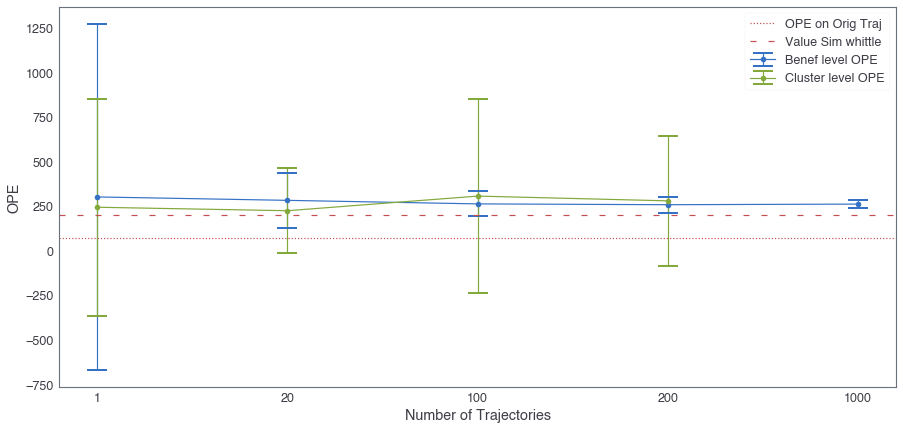

In [222]:
plt.figure(figsize=(15, 7))
# plt.errorbar(np.arange(len(benef_level_ope_dec)), np.array(benef_level_ope_dec)[:, 0],
#              yerr=np.array(benef_level_ope_dec)[:, 1], label='Benef level OPE',
#              marker='o', capsize=10, capthick=2)
# plt.errorbar(np.arange(len(cluster_level_ope_dec)), np.array(cluster_level_ope_dec)[:, 0],
#              yerr=np.array(cluster_level_ope_dec)[:, 1], label='Cluster level OPE Dec',
#              marker='o', capsize=10, capthick=2)

plt.errorbar(np.arange(len(benef_level_ope)), np.mean(benef_level_ope, axis=1),
             yerr=np.std(benef_level_ope, axis=1), label='Benef level OPE',
             marker='o', capsize=10, capthick=2)
plt.errorbar(np.arange(len(cluster_level_ope)), np.mean(cluster_level_ope, axis=1),
             yerr=np.std(cluster_level_ope, axis=1), label='Cluster level OPE',
             marker='o', capsize=10, capthick=2)

plt.axhline(y=ope_whittle,
            color='r', linestyle='dotted', label='OPE on Orig Traj')
plt.axhline(y=simulated_rewards[0][policy_map[target_policy_name]],
            color='r', linestyle=(0, (5, 10)), label=f'Value Sim {target_policy_name}')
# plt.axhline(y=simulated_rewards[0][policy_map[beh_policy_name]],
#             color='r', linestyle='dashdot', label=f'Value Sim {beh_policy_name}')

plt.xticks(np.arange(len(traj_sample_sizes)), traj_sample_sizes)
plt.xlabel('Number of Trajectories')
plt.ylabel('OPE')
plt.legend()
plt.grid(False)
plt.show()

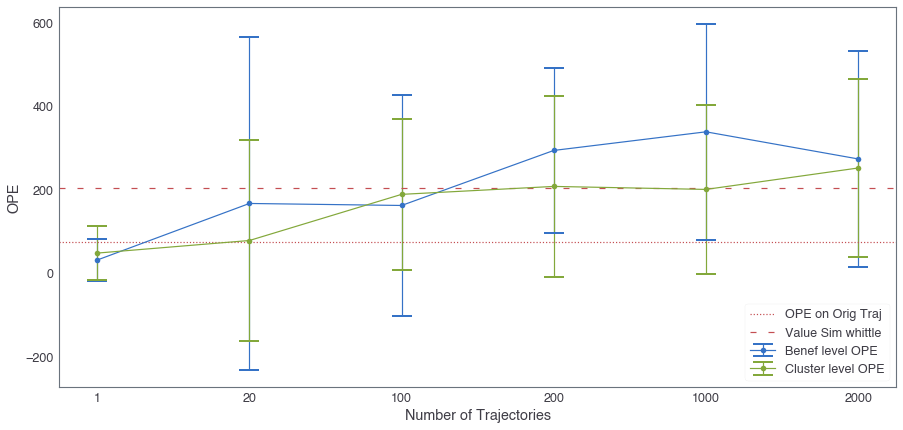

In [125]:
def evaluate(aug_traj, traj_sample_size, n_samples):
    out = []
    print(f'Evaluation on {traj_sample_size} trajectories')
    for _ in range(n_samples):
        traj_idx_sample = np.random.choice(len(benef_level_aug_traj), traj_sample_size, replace=False)

        aug_traj_subset = aug_traj[traj_idx_sample]

        ope_whittle = opeIS(aug_traj_subset, w, mask, n_benefs, T, K, traj_sample_size, gamma,
                    target_policy_name, beh_policy_name)
        out.append(ope_whittle)
    print('\tFinal OPE: ', np.mean(out))
    print('\tstd-dev', np.std(out))
    return out

n_samples = 10
traj_sample_sizes = [1, 20, 100, 200, 1000, 2000]
# benef_level_ope = []
# cluster_level_ope = []
# for traj_sample_size in traj_sample_sizes:
#     benef_level_ope.append(evaluate(benef_level_aug_traj, traj_sample_size, n_samples))
#     cluster_level_ope.append(evaluate(cluster_level_aug_traj, traj_sample_size, n_samples))
plt.figure(figsize=(15, 7))
plt.errorbar(np.arange(len(benef_level_ope)), np.array(benef_level_ope)[:, 0],
             yerr=np.array(benef_level_ope)[:, 1], label='Benef level OPE',
             marker='o', capsize=10, capthick=2)
plt.errorbar(np.arange(len(cluster_level_ope)), np.array(cluster_level_ope)[:, 0],
             yerr=np.array(cluster_level_ope)[:, 1], label='Cluster level OPE',
             marker='o', capsize=10, capthick=2)
plt.axhline(y=ope_whittle,
            color='r', linestyle='dotted', label='OPE on Orig Traj')
plt.axhline(y=simulated_rewards[0][policy_map[target_policy_name]],
            color='r', linestyle=(0, (5, 10)), label=f'Value Sim {target_policy_name}')
# plt.axhline(y=simulated_rewards[0][policy_map[beh_policy_name]],
#             color='r', linestyle='dashdot', label=f'Value Sim {beh_policy_name}')

plt.xticks(np.arange(len(traj_sample_sizes)), traj_sample_sizes)
plt.xlabel('Number of Trajectories')
plt.ylabel('OPE')
plt.legend()
plt.grid(False)
plt.show()

In [58]:
help(plt.errorbar)

Help on function errorbar in module matplotlib.pyplot:

errorbar(x, y, yerr=None, xerr=None, fmt='', ecolor=None, elinewidth=None, capsize=None, barsabove=False, lolims=False, uplims=False, xlolims=False, xuplims=False, errorevery=1, capthick=None, *, data=None, **kwargs)
    Plot y versus x as lines and/or markers with attached errorbars.
    
    *x*, *y* define the data locations, *xerr*, *yerr* define the errorbar
    sizes. By default, this draws the data markers/lines as well the
    errorbars. Use fmt='none' to draw errorbars without any data markers.
    
    Parameters
    ----------
    x, y : float or array-like
        The data positions.
    
    xerr, yerr : float or array-like, shape(N,) or shape(2, N), optional
        The errorbar sizes:
    
        - scalar: Symmetric +/- values for all data points.
        - shape(N,): Symmetric +/-values for each data point.
        - shape(2, N): Separate - and + values for each bar. First row
          contains the lower errors, 

In [10]:
n_rep_exps = 10
traj_sample_size = 200
out = []

for _ in range(n_rep_exps):
    
    traj_idx_sample = np.random.choice(len(benef_level_aug_traj), traj_sample_size, replace=False)

    aug_traj_subset = benef_level_aug_traj[traj_idx_sample]

    ope_whittle = opeIS(aug_traj_subset, w, mask, n_benefs, T, K, traj_sample_size, gamma,
                target_policy_name, beh_policy_name)
    out.append(ope_whittle)
print('Final OPE: ', np.mean(out))

OPE: 478.67046827057436
OPE: 560.6097588846432
OPE: 491.051730385249
OPE: 571.656579147797
OPE: 486.23604053362425
OPE: 517.9113949773104
OPE: 532.8807520247236
OPE: 502.6086536806715
OPE: 532.9395128248507
OPE: 521.091153301499
Final OPE:  519.5656044030943


In [12]:
n_rep_exps = 10
traj_sample_size = 1200
out = []

for _ in range(n_rep_exps):
    traj_idx_sample = np.random.choice(len(cluster_level_aug_traj), traj_sample_size, replace=False)

    aug_traj_subset = cluster_level_aug_traj[traj_idx_sample]

    ope_whittle = opeIS(aug_traj_subset, w, mask, n_benefs, T, K, traj_sample_size, gamma,
                target_policy_name, beh_policy_name)
    out.append(ope_whittle)
print('Final OPE: ', np.mean(out))

OPE: 349.47288620876446
OPE: 339.6634868872148
OPE: 339.5507434011035
OPE: 348.2031662989472
OPE: 348.74158554029646
OPE: 346.37269657843336
OPE: 345.47865521625715
OPE: 347.38731416409144
OPE: 349.5749738547659
OPE: 352.3348203414302
Final OPE:  346.6780328491305


In [144]:
import tqdm

n_aug_traj = 2000
aug_traj = np.zeros((n_aug_traj, 1, T-1, len(dim_dict), n_benefs))
for aug_traj_i in tqdm.tqdm(range(n_aug_traj)):
    for benef in range(n_benefs):
        s, a = traj[trial_id, # trial index
            policy_id, # policy index
            0, # time index
            [dim_dict['state'], dim_dict['action']], # tuple dimension
            benef # benef index
        ]
        benef_cluster = masked_cluster_ids[benef]
        emp_prob = emp_prob_by_cluster[benef_cluster]
        emp_prob = emp_prob_by_benef[benef]
        for ts in range(T-1):
            options = emp_prob[(s, a)]
            options = imputeEmpProb(options)
            choice = np.random.choice(np.arange(len(list(options.keys()))),
                                         p=list(options.values()))
            s_prime, a_prime = list(options.keys())[choice]
            aug_traj[aug_traj_i, 0, ts, dim_dict['state'], benef] = s
            aug_traj[aug_traj_i, 0, ts, dim_dict['action'], benef] = a
            aug_traj[aug_traj_i, 0, ts, dim_dict['new_state'], benef] = s_prime
            aug_traj[aug_traj_i, 0, ts, dim_dict['reward'], benef] = s
            s, a = s_prime, a_prime
print('Generated Augmented Traj of shape: ', aug_traj.shape)

100%|██████████| 2000/2000 [05:48<00:00,  5.75it/s]

Generated Augmented Traj of shape:  (2000, 1, 7, 4, 1000)


In [183]:
n_rep_exps = 10
out = []
for _ in range(n_rep_exps):
    traj_sample_size = 200
    traj_idx_sample = np.random.choice(len(aug_traj), traj_sample_size, replace=False)
#     print(traj_idx_sample[:10])
    aug_traj_subset = aug_traj[traj_idx_sample]
#     print(aug_traj_subset.shape)
    ope_whittle = opeIS(aug_traj_subset, w, mask, n_benefs, T, K, traj_sample_size, gamma,
                target_policy_name, beh_policy_name)
    out.append(ope_whittle)
print('Final OPE: ', np.mean(out))

OPE: 8245.984495475637
OPE: 7964.63922909361


KeyboardInterrupt: 

In [184]:
# aug_traj = np.copy(cluster_aug_traj)

In [185]:
n_rep_exps = 10
out = []
for _ in range(n_rep_exps):
    traj_sample_size = 200
    traj_idx_sample = np.random.choice(len(aug_traj), traj_sample_size, replace=False)
#     print(traj_idx_sample[:10])
    aug_traj_subset = aug_traj[traj_idx_sample]
#     print(aug_traj_subset.shape)
    ope_whittle = opeIS(aug_traj_subset, w, mask, n_benefs, T, K, traj_sample_size, gamma,
                target_policy_name, beh_policy_name)
    out.append(ope_whittle)
print('Final OPE: ', np.mean(out))

OPE: 2825.099887393634
OPE: 2700.785538689719
OPE: 2747.863800830046
OPE: 2716.4331227936527
OPE: 2751.2209803186643


KeyboardInterrupt: 

In [186]:
ope_whittle = opeIS(traj, w, mask, n_benefs, T, K, n_trials, gamma,
                        target_policy_name, beh_policy_name)

OPE: 3112.496776473288


In [106]:
print(aug_traj.shape)
ope_whittle = opeIS(aug_traj, w, mask, n_benefs, T, K, n_trials, gamma,
                    target_policy_name, beh_policy_name)

(2000, 1, 7, 4, 1000)
OPE: 1934.4703411283563


In [104]:
print(aug_traj.shape)
ope_whittle = opeIS(aug_traj, w, mask, n_benefs, T, K, n_trials, gamma,
                    target_policy_name, beh_policy_name)

(200, 1, 7, 4, 1000)
OPE: 2687.099437650146


In [101]:
#20 traj
ope_whittle = opeIS(aug_traj, w, mask, n_benefs, T, K, n_trials, gamma,
                    target_policy_name, beh_policy_name)

OPE: 2180.9892245148408


In [99]:
# 1 traj
ope_whittle = opeIS(traj, w, mask, n_benefs, T, K, n_trials, gamma,
                    target_policy_name, beh_policy_name)

OPE: 3112.496776473288


In [92]:
aug_traj.shape

(2, 1, 7, 4, 1000)

In [264]:
policy = 0
benef = 3
trial = 0
benef_i_traj = traj[trial, # trial index
        policy, # policy index
        :, # time index
        :, # tuple dimension
        benef # benef index
    ]

s_traj =  benef_i_traj[:-1, dim_dict['state']]
a_traj =  benef_i_traj[:-1, dim_dict['action']]
s_prime_traj =  benef_i_traj[:-1, dim_dict['new_state']]
a_prime_traj = benef_i_traj[1:, dim_dict['action']]
len(s_traj), len(a_traj), len(s_prime_traj), len(a_prime_traj)
print(s_traj)
transitions = pd.DataFrame({'s':s_traj,
                         's_prime': s_prime_traj,
                         'a': a_traj,
                         'a_prime': a_prime_traj})
s_vals = [0, 1]
a_vals = [0, 1]
min_sup = 1

emp_prob = {}
for s in s_vals:
    for a in a_vals:
        s_a = transitions[(transitions['s']==s) &
                                (transitions['a']==a)
                               ]
        s_a_count = s_a.shape[0]
        
        for s_prime in s_vals:
            for a_prime in a_vals:
                s_a_s_prime_a_prime = s_a[(s_a['s_prime']==s_prime) &
                                                (s_a['a_prime']==a_prime)
                                               ]
                s_a_s_prime_a_prime_count = s_a_s_prime_a_prime.shape[0]
                key = (s, a, s_prime, a_prime)
                if s_a_count >= min_sup:
                    emp_prob[key] = s_a_s_prime_a_prime_count/s_a_count
                else:
                    emp_prob[key] = None
emp_prob

[1. 0. 0. 0. 0. 0.]


{(0, 0, 0, 0): 0.75,
 (0, 0, 0, 1): 0.25,
 (0, 0, 1, 0): 0.0,
 (0, 0, 1, 1): 0.0,
 (0, 1, 0, 0): 1.0,
 (0, 1, 0, 1): 0.0,
 (0, 1, 1, 0): 0.0,
 (0, 1, 1, 1): 0.0,
 (1, 0, 0, 0): 1.0,
 (1, 0, 0, 1): 0.0,
 (1, 0, 1, 0): 0.0,
 (1, 0, 1, 1): 0.0,
 (1, 1, 0, 0): None,
 (1, 1, 0, 1): None,
 (1, 1, 1, 0): None,
 (1, 1, 1, 1): None}

In [265]:
masked_clusters = np.array(cluster_ids)[mask]
cl = 10
policy = 0
benefs = np.arange(n_benefs)[masked_clusters==cl]
trial = 0
benef_ci_traj = traj[trial, # trial index
        policy, # policy index
        :, # time index
        :, # tuple dimension
        benefs # benef index
    ]
print(f'Shape of Cluster {cl} beneficiaries\' trajectories: ', benef_ci_traj.shape)

s_traj_c =  benef_ci_traj[:, :-1, dim_dict['state']]
a_traj_c =  benef_ci_traj[:, :-1, dim_dict['action']]
s_prime_traj_c =  benef_ci_traj[:, :-1, dim_dict['new_state']]
a_prime_traj_c = benef_ci_traj[:, 1:, dim_dict['action']]

transitions = pd.DataFrame(columns = ['s', 's_prime', 'a', 'a_prime'])

for s_traj, a_traj, s_prime_traj, a_prime_traj in \
                    zip(s_traj_c, a_traj_c, s_prime_traj_c, a_prime_traj_c):
    transitions = transitions.append(pd.DataFrame({'s':s_traj,
                             's_prime': s_prime_traj,
                             'a': a_traj,
                             'a_prime': a_prime_traj}), ignore_index=True)
s_vals = [0, 1]
a_vals = [0, 1]
min_sup = 1

emp_prob = {}
for s in s_vals:
    for a in a_vals:
        s_a = transitions[(transitions['s']==s) &
                                (transitions['a']==a)
                               ]
        s_a_count = s_a.shape[0]
        
        for s_prime in s_vals:
            for a_prime in a_vals:
                s_a_s_prime_a_prime = s_a[(s_a['s_prime']==s_prime) &
                                                (s_a['a_prime']==a_prime)
                                               ]
                s_a_s_prime_a_prime_count = s_a_s_prime_a_prime.shape[0]
                key = (s, a, s_prime, a_prime)
                if s_a_count >= min_sup:
                    emp_prob[key] = s_a_s_prime_a_prime_count/s_a_count
                else:
                    emp_prob[key] = None
emp_prob

Shape of Cluster 10 beneficiaries' trajectories:  (87, 7, 4)


{(0, 0, 0, 0): 0.7204610951008645,
 (0, 0, 0, 1): 0.2680115273775216,
 (0, 0, 1, 0): 0.008645533141210375,
 (0, 0, 1, 1): 0.002881844380403458,
 (0, 1, 0, 0): 0.6910569105691057,
 (0, 1, 0, 1): 0.18699186991869918,
 (0, 1, 1, 0): 0.11382113821138211,
 (0, 1, 1, 1): 0.008130081300813009,
 (1, 0, 0, 0): 0.8181818181818182,
 (1, 0, 0, 1): 0.18181818181818182,
 (1, 0, 1, 0): 0.0,
 (1, 0, 1, 1): 0.0,
 (1, 1, 0, 0): 1.0,
 (1, 1, 0, 1): 0.0,
 (1, 1, 1, 0): 0.0,
 (1, 1, 1, 1): 0.0}

In [199]:
traj[trial, # trial index
        policy, # policy index
        :, # time index
        0, # tuple dimension
        : # benef index
    ]

array([[1., 0., 1., 1., 0., 0., 0., 1., 0., 0.],
       [1., 1., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 1., 0., 0., 1., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 1., 0., 0.]])

## Viz results

Expected reward of policy random is 13.0
Expected reward of policy rr is 12.0
Expected reward of policy whittle is 8.0
OPE: 18.29950038674362
Expected reward of policy random is 12.6
Expected reward of policy rr is 13.2
Expected reward of policy whittle is 12.6
OPE: 10.330057108177716
Expected reward of policy random is 12.2
Expected reward of policy rr is 13.8
Expected reward of policy whittle is 13.3
OPE: 9.932264339943393
Expected reward of policy random is 13.75
Expected reward of policy rr is 13.3
Expected reward of policy whittle is 13.4
OPE: 13.269863501474726
Expected reward of policy random is 13.13
Expected reward of policy rr is 13.25
Expected reward of policy whittle is 13.83
OPE: 13.452756286491416
Expected reward of policy random is 13.38
Expected reward of policy rr is 13.245
Expected reward of policy whittle is 14.155
OPE: 13.651626866015848
Expected reward of policy random is 13.443
Expected reward of policy rr is 13.3
Expected reward of policy whittle is 14.122
OPE: 1

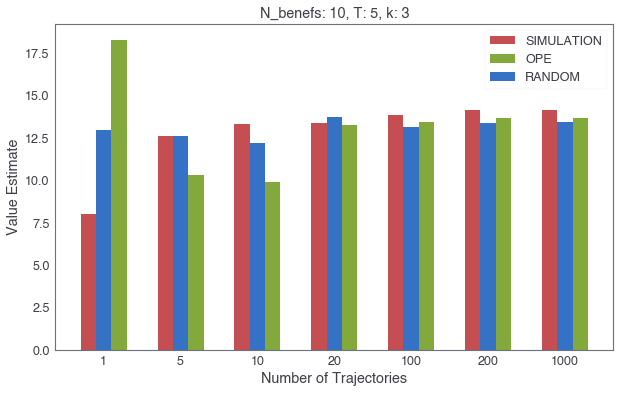

In [161]:
n_benefs = 10
T = 5
K = 3
gamma = 1

width = 0.2
trial_set = [1, 5, 10, 20, 100, 200, 1000]
plt.figure(figsize=(10, 6))
for idx, trials in enumerate(trial_set):
    traj, sim_whittle, simulated_rewards, mask = get_sim_results(n_benefs, T, K, trials, gamma)
    ope_whittle = ope(traj, mask, n_benefs, T, K, trials, gamma)
    sim_random = simulated_rewards[:, 0].mean()
    if idx == len(exp_set)-1:
        plt.bar(idx+1-width, sim_whittle, width=width, color='r', label='SIMULATION')
        plt.bar(idx+1+width, ope_whittle, width=width, color='g', label='OPE')
        plt.bar(idx+1, sim_random, width=width, color='b', label='RANDOM')
    else:
        plt.bar(idx+1-width, sim_whittle, width=width, color='r')
        plt.bar(idx+1+width, ope_whittle, width=width, color='g')
        plt.bar(idx+1, sim_random, width=width, color='b')
plt.grid(b=None)
plt.xticks(range(1, len(trial_set)+1), trial_set)
plt.ylabel('Value Estimate')
plt.xlabel('Number of Trajectories')
plt.title(f'N_benefs: {n_benefs}, T: {T}, k: {K}')
plt.legend()
print(sim_whittle, ope_whittle)

Expected reward of policy random is 13.4045
Expected reward of policy rr is 13.32
Expected reward of policy whittle is 14.116
OPE: 13.637565624581601
Expected reward of policy random is 26.6995
Expected reward of policy rr is 26.6315
Expected reward of policy whittle is 29.1775
OPE: 27.973172445835463
Expected reward of policy random is 39.93
Expected reward of policy rr is 40.3515
Expected reward of policy whittle is 44.3395
OPE: 33.76698624287004
Expected reward of policy random is 53.2225
Expected reward of policy rr is 53.7205
Expected reward of policy whittle is 59.3475
OPE: 37.06517419534336
Expected reward of policy random is 66.3765
Expected reward of policy rr is 66.9905
Expected reward of policy whittle is 74.2495
OPE: 38.79627471373428
Expected reward of policy random is 79.632
Expected reward of policy rr is 80.674
Expected reward of policy whittle is 89.33
OPE: 39.12190405377136
89.33 39.12190405377136


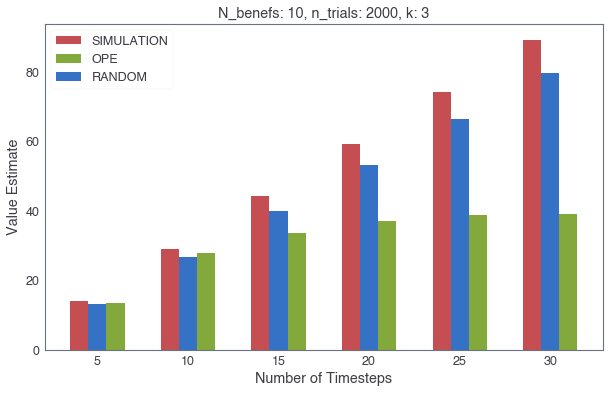

In [163]:
n_benefs = 10
K = 3
gamma = 1
n_trials = 2000

width = 0.2
T_set = [5, 10, 15, 20, 25, 30]
plt.figure(figsize=(10, 6))
for idx, time in enumerate(T_set):
    traj, sim_whittle, simulated_rewards, mask = get_sim_results(n_benefs, time, K, n_trials, gamma)
    ope_whittle = ope(traj, mask, n_benefs, time, K, n_trials, gamma)
    sim_random = simulated_rewards[:, 0].mean()
    if idx == len(exp_set)-1:
        plt.bar(idx+1-width, sim_whittle, width=width, color='r', label='SIMULATION')
        plt.bar(idx+1+width, ope_whittle, width=width, color='g', label='OPE')
        plt.bar(idx+1, sim_random, width=width, color='b', label='RANDOM')
    else:
        plt.bar(idx+1-width, sim_whittle, width=width, color='r')
        plt.bar(idx+1+width, ope_whittle, width=width, color='g')
        plt.bar(idx+1, sim_random, width=width, color='b')
plt.grid(b=None)
plt.xticks(range(1, len(T_set)+1), T_set)
plt.ylabel('Value Estimate')
plt.xlabel('Number of Timesteps')
plt.title(f'N_benefs: {n_benefs}, n_trials: {n_trials}, k: {K}')
plt.legend()
print(sim_whittle, ope_whittle)

10
Expected reward of policy random is 13.75
Expected reward of policy rr is 13.3
Expected reward of policy whittle is 13.4
OPE: 13.269863501474726
50
Expected reward of policy random is 69.95
Expected reward of policy rr is 71.4
Expected reward of policy whittle is 76.8
OPE: 80.94850300907785
100
Expected reward of policy random is 143.55
Expected reward of policy rr is 141.1
Expected reward of policy whittle is 156.0
OPE: 137.3438900598144
200
Expected reward of policy random is 268.45
Expected reward of policy rr is 273.0
Expected reward of policy whittle is 299.95
OPE: 258.3347995605325
1000
Expected reward of policy random is 1274.25
Expected reward of policy rr is 1283.95
Expected reward of policy whittle is 1376.75
OPE: 1288.3414817530954
1376.75 1288.3414817530954


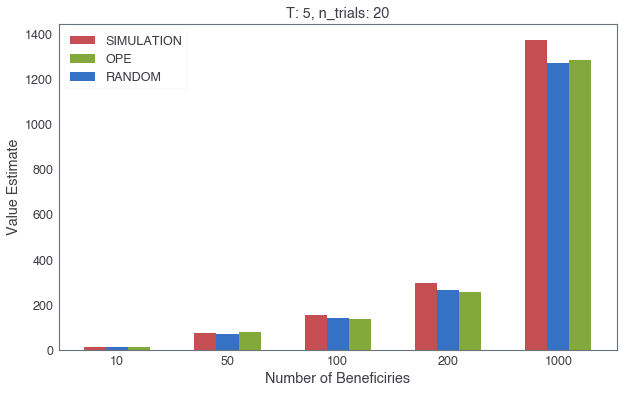

In [159]:

gamma = 1
n_trials = 20
T = 5

width = 0.2
exp_set = [10, 50, 100, 200, 1000]
K_set = [3, 16, 20, 40, 100]

plt.figure(figsize=(10, 6))
for idx, (n_benefs, K) in enumerate(zip(exp_set, K_set)):
    print(n_benefs)
    traj, sim_whittle, simulated_rewards, mask = get_sim_results(n_benefs, T, K, n_trials, gamma)
    ope_whittle = ope(traj, mask, n_benefs, T, K, n_trials, gamma)
    sim_random = simulated_rewards[:, 0].mean()
    if idx == len(exp_set)-1:
        plt.bar(idx+1-width, sim_whittle, width=width, color='r', label='SIMULATION')
        plt.bar(idx+1+width, ope_whittle, width=width, color='g', label='OPE')
        plt.bar(idx+1, sim_random, width=width, color='b', label='RANDOM')
    else:
        plt.bar(idx+1-width, sim_whittle, width=width, color='r')
        plt.bar(idx+1+width, ope_whittle, width=width, color='g')
        plt.bar(idx+1, sim_random, width=width, color='b')
plt.grid(b=None)
plt.xticks(range(1, len(exp_set)+1), exp_set)
plt.ylabel('Value Estimate')
plt.xlabel('Number of Beneficiries')
plt.title(f'T: {T}, n_trials: {n_trials}')
plt.legend()
print(sim_whittle, ope_whittle)

10
Expected reward of policy random is 82.0
Expected reward of policy rr is 85.0
Expected reward of policy whittle is 98.0
OPE: 18.35799425616735
50
Expected reward of policy random is 452.0
Expected reward of policy rr is 452.0
Expected reward of policy whittle is 509.0
OPE: 145.292835630022
100
Expected reward of policy random is 900.0
Expected reward of policy rr is 885.0
Expected reward of policy whittle is 1034.0
OPE: 273.99583783421684
200
Expected reward of policy random is 1605.0
Expected reward of policy rr is 1640.0
Expected reward of policy whittle is 1938.0
OPE: 1234.6739452279915
1000
Expected reward of policy random is 7618.0
Expected reward of policy rr is 7693.0
Expected reward of policy whittle is 8786.0
OPE: 6121.5869808035895
8786.0 6121.5869808035895


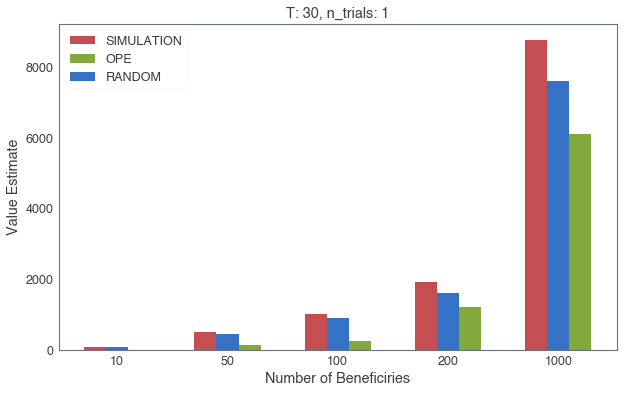

In [158]:

gamma = 1
n_trials = 1
T = 30

width = 0.2
exp_set = [10, 50, 100, 200, 1000]
K_set = [3, 16, 20, 40, 100]

plt.figure(figsize=(10, 6))
for idx, (n_benefs, K) in enumerate(zip(exp_set, K_set)):
    print(n_benefs)
    traj, sim_whittle, simulated_rewards, mask = get_sim_results(n_benefs, T, K, n_trials, gamma)
    ope_whittle = ope(traj, mask, n_benefs, T, K, n_trials, gamma)
    sim_random = simulated_rewards[:, 0].mean()
    if idx == len(exp_set)-1:
        plt.bar(idx+1-width, sim_whittle, width=width, color='r', label='SIMULATION')
        plt.bar(idx+1+width, ope_whittle, width=width, color='g', label='OPE')
        plt.bar(idx+1, sim_random, width=width, color='b', label='RANDOM')
    else:
        plt.bar(idx+1-width, sim_whittle, width=width, color='r')
        plt.bar(idx+1+width, ope_whittle, width=width, color='g')
        plt.bar(idx+1, sim_random, width=width, color='b')
plt.grid(b=None)
plt.xticks(range(1, len(exp_set)+1), exp_set)
plt.ylabel('Value Estimate')
plt.xlabel('Number of Beneficiries')
plt.title(f'T: {T}, n_trials: {n_trials}')
plt.legend()
print(sim_whittle, ope_whittle)

In [37]:
# del traj

In [38]:
#Idea: Stitch Trajectories starting from same state, action


## Whittle IS Estimate vs Random

In [57]:
compare = {'target':2, 'beh':0}
dim_dict = {'state':0, 'action':1, 'new_state':2, 'reward':3}
gamma_series = np.array([gamma**(t-1) for t in range(T-1)])

v = []
for benef in range(n_benefs):
    v_i = 0
    for trial in range(n_trials):
        imp_weight = 1
        v_i_tau = 0
        for ts in range(T-1):
            a_i_t = traj[trial, # trial index
                            compare['beh'], # policy index
                            ts, # time index
                            dim_dict['action'], # tuple dimension
                            benef # benef index
                            ].astype(int)
            
            s_t = traj[trial, # trial index
                            compare['beh'], # policy index
                            ts, # time index
                            dim_dict['state'], # tuple dimension
                            : # benef index
                            ].astype(int)
            pi_tar = getActionProb(s_t, a_i_t,
                                       policy=compare['target'],
                                       benef=benef, ts=ts,
                                       w=w[mask], k=K)
            pi_beh = getActionProb(s_t, a_i_t,
                                       policy=compare['beh'],
                                       benef=benef, ts=ts,
                                       w=w[mask], k=K)
            imp_weight*= pi_tar/pi_beh
            
#             print_r(f'weigh: {imp_weight},\
#                     pi_tar: {pi_tar}, pi_beh: {pi_beh}',  0.01) 
            v_i_t_tau = gamma_series[ts] * traj[trial, # trial index
                                            compare['beh'], # policy index
                                            ts, # time index
                                            dim_dict['reward'], # tuple dimension
                                            benef # benef index
                                            ] * imp_weight
            v_i_tau += v_i_t_tau
        v_i += v_i_tau
    v.append(v_i/n_trials)
ope = np.sum(v)
print(f'OPE: {ope}')

OPE: 9.932264339943393


## Whittle Weighted IS vs Random

In [687]:
compare = {'target':2, 'beh':0}
dim_dict = {'state':0, 'action':1, 'new_state':2, 'reward':3}
gamma_series = np.array([gamma**(t-1) for t in range(T-1)])
eps = 1e-5

v = []
for benef in range(n_benefs):
    v_i = 0
    imp_weight_sum = 0
    for trial in range(n_trials):
        v_i_tau = 0
        imp_weight = 1
        for ts in range(T-1):
            a_i_t = traj[trial, # trial index
                            compare['beh'], # policy index
                            ts, # time index
                            dim_dict['action'], # tuple dimension
                            benef # benef index
                            ].astype(int)
            
            s_t = traj[trial, # trial index
                            compare['beh'], # policy index
                            ts, # time index
                            dim_dict['state'], # tuple dimension
                            : # benef index
                            ].astype(int)
            pi_tar = getActionProb(s_t, a_i_t,
                                       policy=compare['target'],
                                       benef=benef, ts=ts,
                                       w=w[mask], k=k)
            pi_beh = getActionProb(s_t, a_i_t,
                                       policy=compare['beh'],
                                       benef=benef, ts=ts,
                                       w=w[mask], k=k)
            imp_weight*= pi_tar/pi_beh
            r_i_t_tau = traj[trial, # trial index
                                compare['beh'], # policy index
                                ts, # time index
                                dim_dict['reward'], # tuple dimension
                                benef # benef index
                            ]
            v_i_t_tau = gamma_series[ts] * r_i_t_tau * imp_weight
            imp_weight_sum += imp_weight
            v_i_tau += v_i_t_tau
        v_i += v_i_tau
    v.append(v_i/imp_weight_sum)
ope = np.sum(v)
print(f'WIS OPE: {ope}')

WIS OPE: 11.920399063208444


## Whittle Per Decision Weighted IS vs Random

In [624]:
compare = {'target':2, 'beh':0}
dim_dict = {'state':0, 'action':1, 'new_state':2, 'reward':3}
gamma_series = np.array([gamma**(t-1) for t in range(T-1)])
eps = 1e-5

v = []
imp_weight_dict = {}
for benef in range(n_benefs):
    for trial in range(n_trials):
        imp_weight_dict[(benef, trial, -1)] = 1
        
for ts in range(T-1):
    v_t = 0
    imp_weight_sum = 0
    for benef in range(n_benefs):
        for trial in range(n_trials):
            a_i_t = traj[trial, # trial index
                            compare['beh'], # policy index
                            ts, # time index
                            dim_dict['action'], # tuple dimension
                            benef # benef index
                            ].astype(int)
            
            s_t = traj[trial, # trial index
                            compare['beh'], # policy index
                            ts, # time index
                            dim_dict['state'], # tuple dimension
                            : # benef index
                            ].astype(int)
            
            pi_tar = getActionProb(s_t, a_i_t,
                                       policy=compare['target'],
                                       benef=benef, ts=ts,
                                       w=w[mask], k=k)
            pi_beh = getActionProb(s_t, a_i_t,
                                       policy=compare['beh'],
                                       benef=benef, ts=ts,
                                       w=w[mask], k=k)
            imp_weight_dict[(benef, trial, ts)] = imp_weight_dict[(benef, trial, ts-1)]*pi_tar/pi_beh
            r_i_t_tau = traj[trial, # trial index
                                compare['beh'], # policy index
                                ts, # time index
                                dim_dict['reward'], # tuple dimension
                                benef # benef index
                            ]
            v_i_t_tau = gamma_series[ts] * r_i_t_tau * imp_weight_dict[(benef, trial, ts)] 
            imp_weight_sum += imp_weight
            v_t += v_i_t_tau
    v.append(v_t/imp_weight_sum)
ope = np.sum(v)
print(f'WIS OPE: {ope}')

WIS OPE: 5.939270941552077e+98


In [632]:
imp_weight_dict[(3, 1, 5)]

1.0266106664456463e-12

## Sanity Check with 0.5,0.5

In [438]:
compare = {'target':0, 'beh':2}
dim_dict = {'state':0, 'action':1, 'new_state':2, 'reward':3}
gamma_series = np.array([gamma**(t-1) for t in range(T-1)])

v = []
for trial in range(n_trials):
    v_tau = 0
    for benef in range(n_benefs):
        imp_weight = 1
        v_i_tau = 0
        for ts in range(T-1):
            a_i_t = traj[trial, # trial index
                            compare['target'], # policy index
                            ts, # time index
                            dim_dict['action'], # tuple dimension
                            benef # benef index
                            ]
            
            s_t = traj[trial, # trial index
                            compare['target'], # policy index
                            ts, # time index
                            dim_dict['state'], # tuple dimension
                            : # benef index
                            ]
            
            imp_weight*= getActionProbDefault(s_t, a_i_t, compare['target'])/\
                        getActionProbDefault(s_t, a_i_t, compare['beh'])
            
            v_i_t_tau = gamma_series[ts] * traj[trial, # trial index
                                            compare['target'], # policy index
                                            ts, # time index
                                            dim_dict['reward'], # tuple dimension
                                            benef # benef index
                                            ] * imp_weight
            v_i_tau += v_i_t_tau
        v_tau += v_i_tau
    v.append(v_tau)
ope = np.mean(v)
print(ope)

13.448


In [387]:
v_i/imp_weight_sum

0.0364100668992518

In [301]:
compare = {'target':0, 'beh':1}
dim_dict = {'state':0, 'action':1, 'new_state':2, 'reward':3}
gamma_series = np.array([gamma**(t-1) for t in range(T-1)])
eps = 1e-5

v = []
for trial in range(n_trials):
    v_tau = 0
    for benef in range(n_benefs):
        imp_weight = 1
        v_i_tau = 0
        for ts in range(T-1):
            a_i_t = traj[trial, # trial index
                            compare['target'], # policy index
                            ts, # time index
                            dim_dict['action'], # tuple dimension
                            benef # benef index
                            ]
            
            s_t = traj[trial, # trial index
                            compare['target'], # policy index
                            ts, # time index
                            dim_dict['state'], # tuple dimension
                            : # benef index
                            ]
            
            imp_weight*= getActionProbFrequentist(traj, s_t, a_i_t,
                                                  benef, ts, compare['target'])/\
                        (getActionProbFrequentist(traj, s_t, a_i_t,
                                                  benef, ts, compare['beh'])+eps)
            
            v_i_t_tau = gamma_series[ts] * traj[trial, # trial index
                                            compare['target'], # policy index
                                            ts, # time index
                                            dim_dict['reward'], # tuple dimension
                                            benef # benef index
                                            ] * imp_weight
            v_i_tau += v_i_t_tau
        v_tau += v_i_tau
    v.append(v_tau)
ope = np.mean(v)
print(ope)

0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there


0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there


0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there


0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there


0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there


0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there


0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
0 min sup not there
